# Ce qu'il reste à faire : 

## Partie 1  
 - Comparer le modèle de régression logistique à l'autre. 
## Partie 2  
 - Revoir le modèle LSTM et l'autre
 - Faire la prédiction avec le modèle ARMA(6,0)
 - Comparer les 2 modèles. 

In [42]:
import pandas as pd

data = pd.read_csv("bike_daily.csv")
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
data.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Aucune valeur manquante

In [20]:
print(data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Clairement, season, month week day, year, holiday, sont des variables catégorielles même si ce sont des nombres. On va faire PCA sur les variables temp, atemp, hum, windspeed. 
On va traiter les variables continues. On va quand même faire aussi l'analyse factorielle parce que season, yr, month peuvent quand même être incluse dans un neural network. 

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

X = data[["temp", "atemp", "hum", "windspeed"]]
X.describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


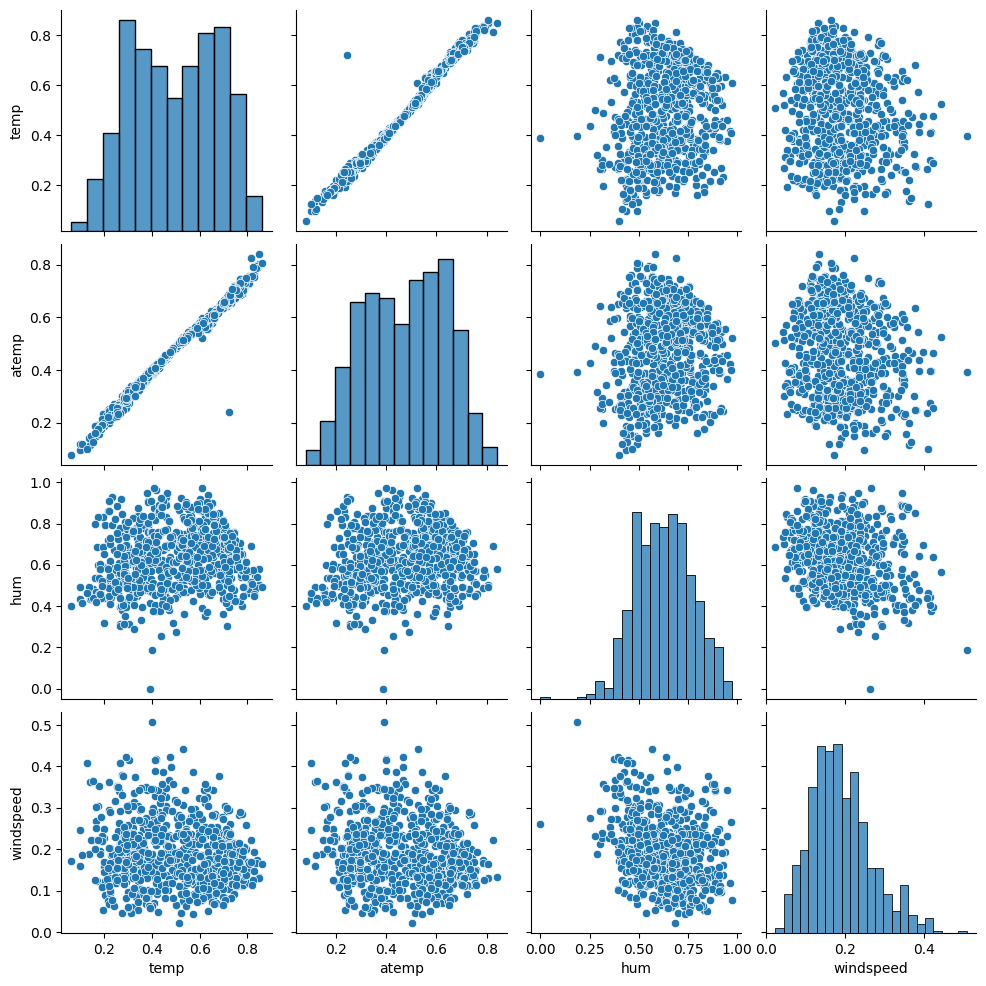

In [43]:
sns.pairplot(X)
plt.show()

Clairement, atemp et temp sont corrélé positivement.Pour le reste, c'est inscertain. 

<Figure size 1000x600 with 0 Axes>

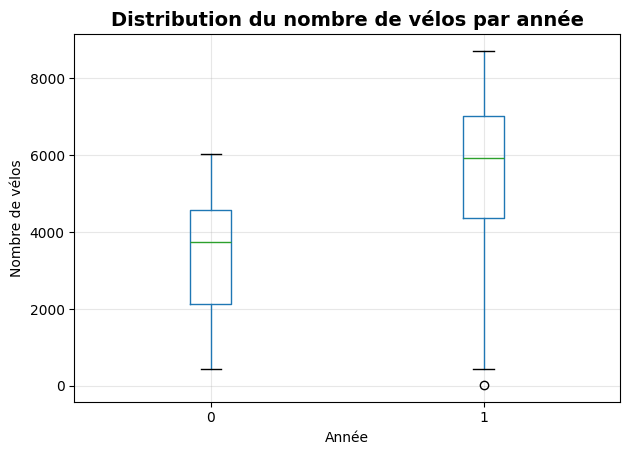

In [45]:
plt.figure(figsize=(10, 6))
data.boxplot(column='cnt', by='yr')
plt.suptitle('')  # Enlever le titre automatique
plt.title('Distribution du nombre de vélos par année', fontsize=14, fontweight='bold')
plt.xlabel('Année')
plt.ylabel('Nombre de vélos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

L'année est aussi un paramètre à prendre en compte pour prédire le nombre de vélo. 

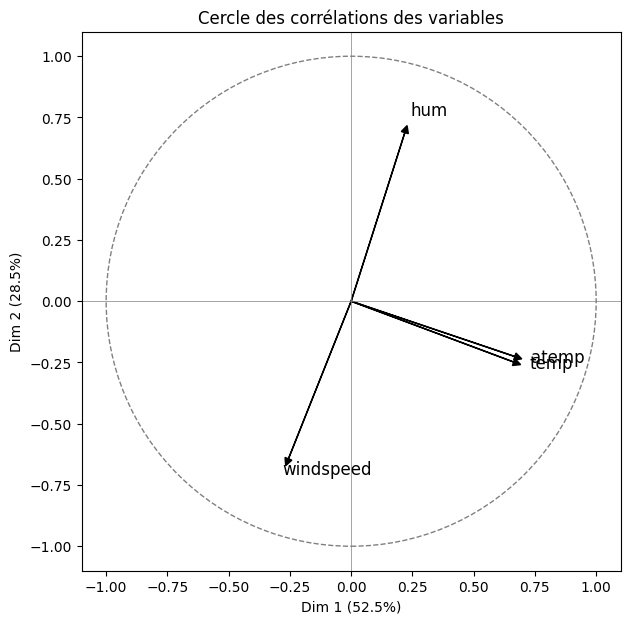

In [46]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)

pca.fit(X_scaled)
components = pca.components_.T  

fig, ax = plt.subplots(figsize=(7,7))

circle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--')
ax.add_artist(circle)

for i, var in enumerate(X.columns):
    x = components[i, 0]
    y = components[i, 1]
    ax.arrow(0, 0, x, y, 
             head_width=0.03, 
             head_length=0.03, 
             linewidth=1, 
             color="black")
    ax.text(x * 1.1, y * 1.1, var, fontsize=12)

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel(f"Dim 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"Dim 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_title("Cercle des corrélations des variables")
ax.axhline(0, color='grey', linewidth=0.5)
ax.axvline(0, color='grey', linewidth=0.5)
ax.set_aspect('equal')

plt.show()

On voit que atemp et temp sont fortement corrélé et représente les vecteurs qui représente le mieux la dimension principale. Tandis que windspeed et humidité sont corrélé négativement avec des flèches dont l'angle est proche de 180°. 

C:\Users\enzom\AppData\Local\Temp\ipykernel_32260\1711461745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_factor[col] = X_factor[col].astype("category")
C:\Users\enzom\AppData\Local\Temp\ipykernel_32260\1711461745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_factor[col] = X_factor[col].astype("category")
C:\Users\enzom\AppData\Local\Temp\ipykernel_32260\1711461745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

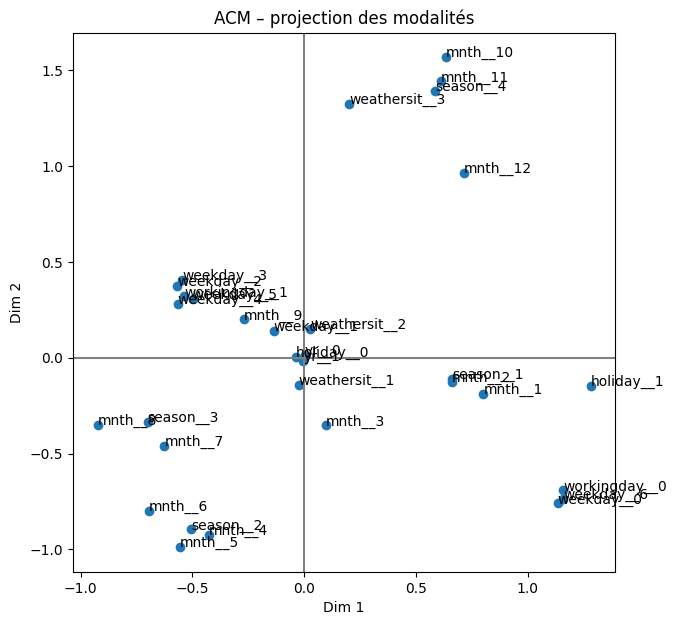

In [47]:
import prince

X_factor = data[["yr", "season", "mnth", "holiday",
                 "weekday", "workingday", "weathersit"]]

# Convertir en catégories
for col in X_factor.columns:
    X_factor[col] = X_factor[col].astype("category")

# ACM avec engine correct
mca = prince.MCA(
    n_components=2,
    n_iter=5,
    engine='sklearn', 
    random_state=42
)

mca = mca.fit(X_factor)

coords = mca.column_coordinates(X_factor)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))

coords = mca.column_coordinates(X_factor)

ax.scatter(coords[0], coords[1])

for i, txt in enumerate(coords.index):
    ax.annotate(txt, (coords.iloc[i,0], coords.iloc[i,1]))

plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.title("ACM – projection des modalités")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()



On voit nettement des clusters. season_4 est proche de mnth_11 mnth_12... season_4 est l'hiver. Pour éviter d'avoir un cercle de corélation trop dense, on va supprimer de l'analyse factorielle les mois et garder uniquement les saisons. 

C:\Users\enzom\AppData\Local\Temp\ipykernel_32260\2040214358.py:90: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


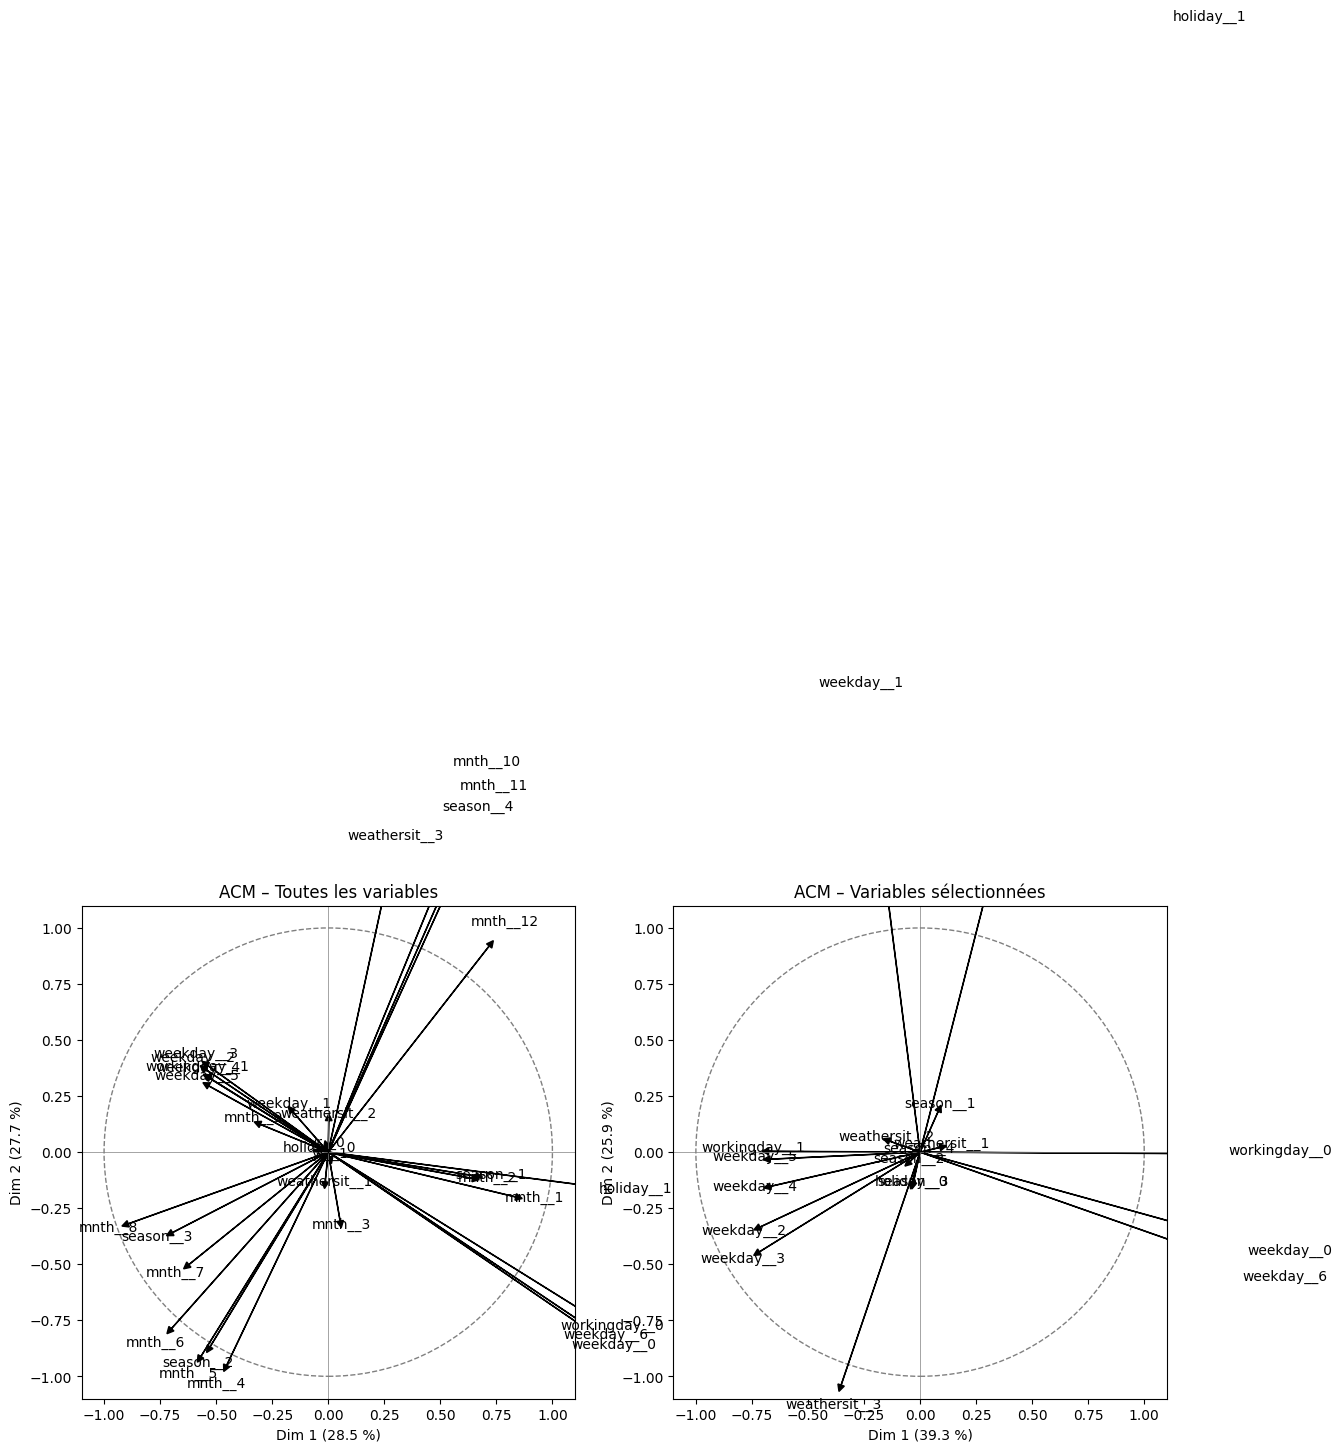

In [48]:
variables_categorielles = [
    "season", "holiday",
    "weekday", "workingday", "weathersit", "mnth", "yr"
]
variables_cat2 = [
    "season", "holiday",
    "weekday", "workingday", "weathersit"
]

X_factor = data[variables_categorielles].copy()
X_factor = X_factor.astype("category")

X_factor2 = data[variables_cat2].copy()
X_factor2 = X_factor2.astype("category")

mca = prince.MCA(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca.fit(X_factor)

mca2 = prince.MCA(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca2.fit(X_factor2)

coords = mca.column_coordinates(X_factor)
inertia = mca.eigenvalues_
dim1, dim2 = inertia[0], inertia[1]

coords2 = mca2.column_coordinates(X_factor2)
inertia2 = mca2.eigenvalues_
dim1_2, dim2_2 = inertia2[0], inertia2[1]

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

cercle1 = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
ax[0].add_artist(cercle1)

for modalite, (x, y) in coords.iterrows():
    ax[0].arrow(
        0, 0, x, y,
        head_width=0.03,
        head_length=0.03,
        linewidth=1,
        color="black"
    )
    ax[0].text(x * 1.1, y * 1.1, modalite, fontsize=10, ha='center')

ax[0].set_xlim(-1.1, 1.1)
ax[0].set_ylim(-1.1, 1.1)
ax[0].set_xlabel(f"Dim 1 ({dim1 * 100:.1f} %)")
ax[0].set_ylabel(f"Dim 2 ({dim2 * 100:.1f} %)")
ax[0].set_title("ACM – Toutes les variables")
ax[0].axhline(0, color='grey', linewidth=0.5)
ax[0].axvline(0, color='grey', linewidth=0.5)
ax[0].set_aspect('equal')

cercle2 = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
ax[1].add_artist(cercle2)

for modalite, (x, y) in coords2.iterrows():
    ax[1].arrow(
        0, 0, x, y,
        head_width=0.03,
        head_length=0.03,
        linewidth=1,
        color="black"
    )
    ax[1].text(x * 1.1, y * 1.1, modalite, fontsize=10, ha='center')

ax[1].set_xlim(-1.1, 1.1)
ax[1].set_ylim(-1.1, 1.1)
ax[1].set_xlabel(f"Dim 1 ({dim1_2 * 100:.1f} %)")
ax[1].set_ylabel(f"Dim 2 ({dim2_2 * 100:.1f} %)")
ax[1].set_title("ACM – Variables sélectionnées")
ax[1].axhline(0, color='grey', linewidth=0.5)
ax[1].axvline(0, color='grey', linewidth=0.5)
ax[1].set_aspect('equal')

plt.tight_layout()
plt.show()

J'ai commencé mon approche en enlevant les features contenant l'année et les mois. Nous avons obtenu le cercle de corrélation de droite. Nous avons dans un premier temps analysé que la composante principale capte essentiellement la variabilité comprise dans workingday = False. L’axe 2 oppose :
des jours particuliers (lundi, jour férié) à des situations de météo très dégradée (weathersit_3). Les deux axes représentent 65,2% de l’inertie, soit une bonne représentation globale pour une ACM. Si on veut par la suite éliminer ou ajouter des variables catégorielles dans notre modèle mais pas trop, on pourrait tester avec un set de variables non corrélés. On va essayer une régression linéaire simple avec les variables catégorielles : workingday et weathersit même si weathersit est potentielement fortement corrélé aux données quantitatives de vent, d'humidité et de température. Si les p_values sont faibles. On les incluera dans le modèle. Prendre holiday et working day même s'ils apparraissent décorrélé sur le cercle, on sait en pratique qu'ils sont fortement corrélés. 

En plottant le cercle de corrélation avec l'ensemble des features catégorielles, on a désormais plus le problème avec les features holiday et working day qui apparaisse plus corrélé. On dégage mieux le fait qu'il y ait un groupe [bad weather, mois de l'hiver] et à l'opposé [good weather, mois d'été] et perpendiculairement, les jours travaillés et les jours non travaillé. 

In [49]:
contingence = pd.crosstab(data["holiday"], data["workingday"],
                   rownames=["holiday"],
                   colnames=["workingday"])

print(contingence)

workingday    0    1
holiday             
0           210  500
1            21    0


Comme on le voit sur la matrice de contingence on ne peut pas travailler et être en vacances. Le cas contraire aurait remis en question l'intégrité de la base de donnée. 

In [57]:
import statsmodels.api as sm

y = data["cnt"]
test_cat = ["weathersit", "workingday", 'yr']

X_categories = X_factor.loc[:,test_cat]
x = pd.get_dummies(X_categories, drop_first=True)#on retire la première variable sinon la matrice n'est pas inversible.

x = x.astype(int)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     123.8
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.54e-80
Time:                        18:56:23   Log-Likelihood:                -6379.6
No. Observations:                 731   AIC:                         1.277e+04
Df Residuals:                     726   BIC:                         1.279e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3570.1233    119.741     29.815   

Le modèle de régression linéaire avec les variables catégorielles démontre que pour les features catégorielles choisient (year, condition météo, working_day) expliquent en parti le nombre de vélos utilisés au total. (p_values < 0.05)

In [59]:
X_scaled = X_scaled[:, [0, 2, 3]]

IndexError: index 3 is out of bounds for axis 1 with size 3

On supprime atemp colinéaire à temp

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split 
import lightning as pl
from lightning.pytorch.utilities.model_summary import ModelSummary
from simplelogger import SimpleLogger


y = data["cnt"]
y = y.values.reshape(-1, 1)

X_categories = X_factor.loc[:, test_cat]
x_cat = pd.get_dummies(X_categories, drop_first=True)
#On enlève les premières modalités pour éviter la redondance dans les variables catégorielles : workingday_1 + workingday_0 = 1
print(x_cat.head())
X_final = pd.concat([pd.DataFrame(X_scaled), x_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

print("Données finales :")
print(X_final.head())
print(f"Shape : {X_final.shape}")

stratify_columns = data[["weathersit", "workingday", 'yr']]

x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,
    stratify=stratify_columns,
    test_size=0.2,
    random_state=123
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print(f"\nx_train shape : {x_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"x_test shape : {x_test.shape}")
print(f"y_test shape : {y_test.shape}")

   weathersit_2  weathersit_3  workingday_1   yr_1
0          True         False         False  False
1          True         False         False  False
2         False         False          True  False
3         False         False          True  False
4         False         False          True  False
Données finales :
          0         1         2  weathersit_2  weathersit_3  workingday_1  \
0 -0.826662  1.250171 -0.387892           1.0           0.0           0.0   
1 -0.721095  0.479113  0.749602           1.0           0.0           0.0   
2 -1.634657 -1.339274  0.746632           0.0           0.0           1.0   
3 -1.614780 -0.263182 -0.389829           0.0           0.0           1.0   
4 -1.467414 -1.341494 -0.046307           0.0           0.0           1.0   

   yr_1  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  
Shape : (731, 7)

x_train shape : torch.Size([584, 7])
y_train shape : torch.Size([584, 1])
x_test shape : torch.Size([147, 7])
y_test shape : torch.Size

In [61]:
x_train.shape[1]

7

 ## Model Definition

  | Name       | Type       | Params | Mode 
--------------------------------------------------
0 | activation | ReLU       | 0      | train
1 | layers     | Sequential | 4.5 K  | train
2 | mse        | MSELoss    | 0      | train
--------------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


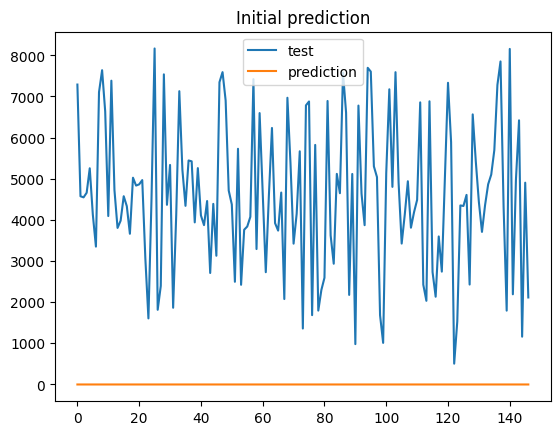

In [63]:
class Bike_model(pl.LightningModule):
    def __init__(self, input_dim, lr=1e-3):
        super(Bike_model, self).__init__()
        self.activation = nn.ReLU()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)   
        )
        self.mse = nn.MSELoss()
        self.lr = lr

    def forward(self, x):
        return self.layers(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.layers(x)
        loss = self.mse(yhat, y)
        self.log(f"train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return [optimizer]

    def validation_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.mse(yhat, y)
        self.log(f"val_loss", loss, on_epoch=True, on_step=False, prog_bar=True)

model = Bike_model(x_train.shape[1], lr=1e-4)
summary = ModelSummary(model)
print(summary)
plt.plot(y_test, label="test")
plt.plot(model(x_test).detach(), label="prediction")
plt.title("Initial prediction")
plt.legend()

 ## Train the Model

In [64]:
trainer = pl.Trainer(
    max_epochs=50,
    logger=SimpleLogger(),
    enable_checkpointing=False,
    log_every_n_steps=1,
)  # logger=False, enable_checkpointing=False to avoid polluting your workspace with lightning_logs and checkpoints

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


In [65]:
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)


  | Name       | Type       | Params | Mode 
--------------------------------------------------
0 | activation | ReLU       | 0      | train
1 | layers     | Sequential | 4.5 K  | train
2 | mse        | MSELoss    | 0      | train
--------------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 49: 100%|██████████| 73/73 [00:00<00:00, 189.90it/s, v_num=Data, val_loss=2.64e+6, train_loss=2.65e+6]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 73/73 [00:00<00:00, 188.79it/s, v_num=Data, val_loss=2.64e+6, train_loss=2.65e+6]


 ## Evaluate Model

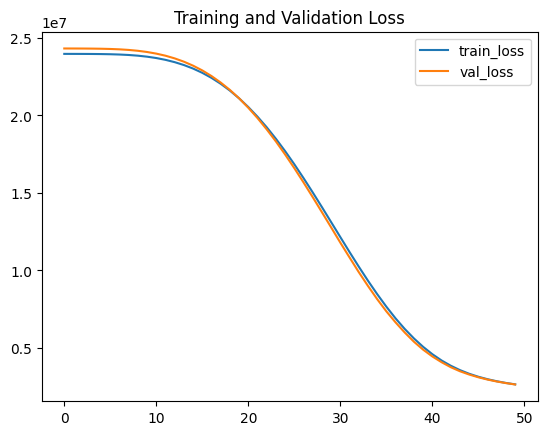

In [66]:
plt.plot(trainer.logger.metrics["train_loss"], label="train_loss")
plt.plot(trainer.logger.metrics["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.legend()

Ici on représente la MSE au fur et à mesure des epoch. On voit que les améliorations du modèle  sont minim après 50 epoch, on diminuera le nombre d'epoch par la suite. Il nous reste encore à compter les prédictions mal classé. 

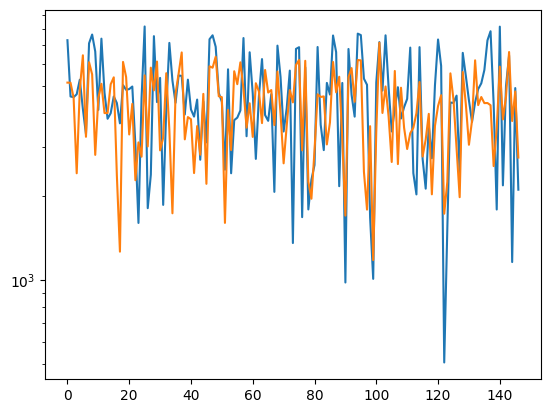

In [67]:
plt.plot(y_test)
plt.plot(model(x_test).detach())
plt.yscale("log")
plt.show()


Prédiction du modèle sur les données test. Il y a un bon suivi des tendances même dans les parties les moins linéaires.


Text(0.5, 1.0, 'Matrice de confusion (seuil=4000)')

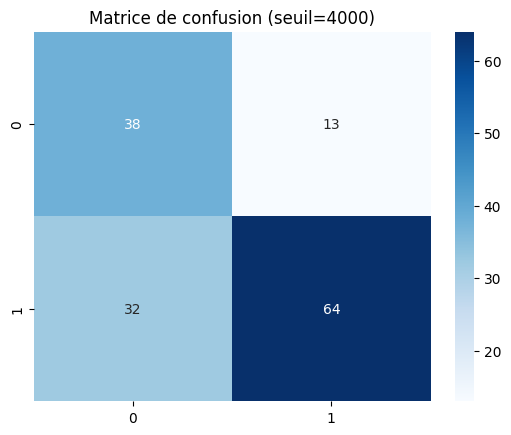

In [68]:
from sklearn.metrics import confusion_matrix
y_pred = model(x_test).detach().numpy().flatten()

# Binariser avec seuil 4000
y_test_bin = (y_test.numpy() >= 4000).astype(int)
y_pred_bin = (y_pred >= 4000).astype(int)

# Matrice de confusion
cm = confusion_matrix(y_test_bin, y_pred_bin)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion (seuil=4000)")

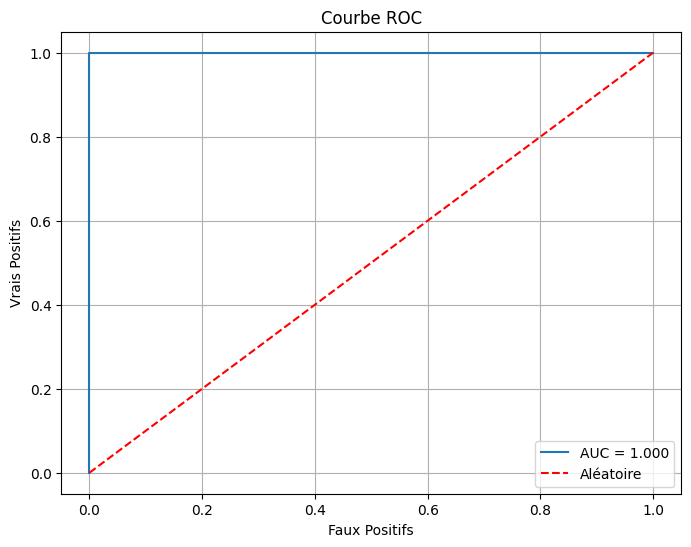

Score AUC: 1.000


In [69]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Prédictions
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for x, y in test_loader:
        predictions.append(model(x))
        actuals.append(y)

predictions = torch.cat(predictions).cpu().numpy()
actuals = torch.cat(actuals).cpu().numpy()



# Classes binaires (>4000 = 1, sinon 0)
actual_class = (predictions > 4000).astype(int)

# Courbe ROC
fpr, tpr, thresholds = roc_curve(actual_class, predictions)
auc_score = auc(fpr, tpr)

# Graphique
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'r--', label='Aléatoire')
plt.xlabel('Faux Positifs')
plt.ylabel('Vrais Positifs')
plt.title('Courbe ROC')
plt.legend()
plt.grid()
plt.show()

print(f"Score AUC: {auc_score:.3f}")

On obtient des résultats parfaits

Dans un second temps on décide d'entraîner 2 RNN différents parce que dans nos données d'entraînement on fait la distinction entre le nombre d’usagers à la fois abonnés et non abonnés.

Le mieux : faire des courches pour évaluer y_1 et y_2 et après une couche y_final = somme des 2 sigma(supérieur pu inférieur à 4000). 

In [70]:
y = data[["registered", "casual"]]
y = y.values.reshape((-1,2))
X_categories = X_factor.loc[:, test_cat]
x_cat = pd.get_dummies(X_categories, drop_first=True)
#On enlève les premières modalités pour éviter la redondance dans les variables catégorielles : workingday_1 + workingday_0 = 1

X_final = pd.concat([pd.DataFrame(X_scaled), x_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,
    stratify=stratify_columns,
    test_size=0.2,
    random_state=123
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [71]:
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("x_train shape:", x_train.shape)
print("x_test shape :", x_test.shape)


x_train shape: torch.Size([584, 7])
x_test shape : torch.Size([147, 7])


In [72]:
class bikemodel_2_output(pl.LightningModule):
    def __init__(self, input_dim, lr=1e-3):
        super(bikemodel_2_output, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)   # deux sorties : casual, registered
        )
        self.mse = nn.MSELoss()
        self.lr = lr
    def forward(self, x):
        return self.layers(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.layers(x)
        loss = self.mse(yhat, y)
        mae = (yhat - y).abs().mean(1)
        self.log(f"train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return [optimizer]

    def validation_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.mse(yhat, y)
        self.log(f"val_loss", loss, on_epoch=True, on_step=False, prog_bar=True)

model = bikemodel_2_output(x_train.shape[1], lr=1e-4)
summary = ModelSummary(model)
print(summary)

  | Name   | Type       | Params | Mode 
----------------------------------------------
0 | layers | Sequential | 4.5 K  | train
1 | mse    | MSELoss    | 0      | train
----------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


In [73]:
trainer = pl.Trainer(
    max_epochs=150,
    logger=SimpleLogger(),
    enable_checkpointing=False,
    log_every_n_steps=1,
)  # logger=False, enable_checkpointing=False to avoid polluting your workspace with lightning_logs and checkpoints

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Avec seulement 50 epoch ça n'a pas entraîner assez.

In [74]:
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)


  | Name   | Type       | Params | Mode 
----------------------------------------------
0 | layers | Sequential | 4.5 K  | train
1 | mse    | MSELoss    | 0      | train
----------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 149: 100%|██████████| 73/73 [00:00<00:00, 178.03it/s, v_num=Data, val_loss=5.49e+5, train_loss=5.62e+5]

`Trainer.fit` stopped: `max_epochs=150` reached.


Epoch 149: 100%|██████████| 73/73 [00:00<00:00, 177.46it/s, v_num=Data, val_loss=5.49e+5, train_loss=5.62e+5]


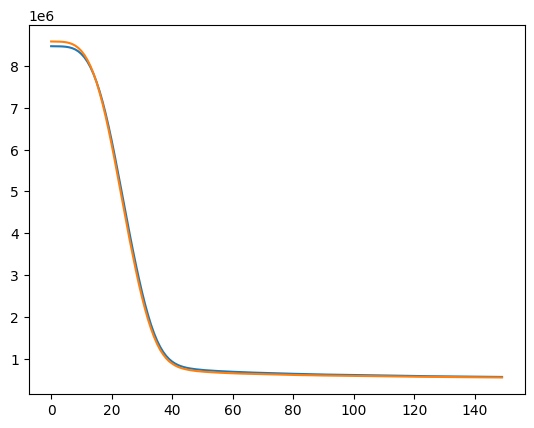

In [75]:

plt.plot(trainer.logger.metrics["train_loss"])
plt.plot(trainer.logger.metrics["val_loss"])
plt.show()

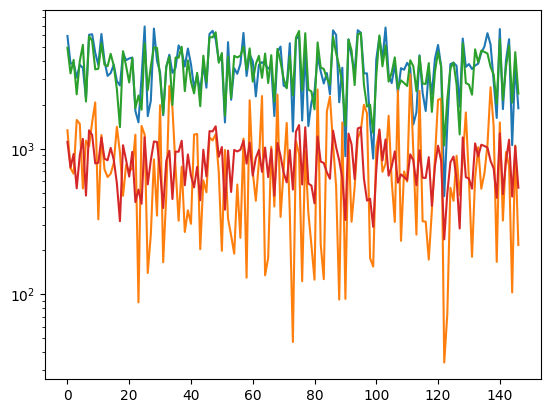

In [76]:
plt.plot(y_test)
plt.plot(model(x_test).detach())
plt.yscale("log")
plt.show()


Les prédictions sur registered sont meilleurs que sur casual qui doit sûrement avoir plus de variance. 

In [156]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Prédictions
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for x, y in test_loader:
        predictions.append(model(x))
        actuals.append(y)

predictions = torch.cat(predictions).cpu().numpy()
actuals = torch.cat(actuals).cpu().numpy()

# Total vélos (somme des 2 colonnes)
pred_total = predictions[:, 0] + predictions[:, 1]
actual_total = actuals[:, 0] + actuals[:, 1]

# Classes binaires (>4000 = 1, sinon 0)
actual_class = (actual_total > 4000).astype(int)

# Courbe ROC
fpr, tpr, thresholds = roc_curve(actual_class, pred_total)
auc_score = auc(fpr, tpr)

# Graphique
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'r--', label='Aléatoire')
plt.xlabel('Faux Positifs')
plt.ylabel('Vrais Positifs')
plt.title('Courbe ROC')
plt.legend()
plt.grid()
plt.show()

print(f"Score AUC: {auc_score:.3f}")

IndexError: index 1 is out of bounds for axis 1 with size 1

# Question 3

Au lieu de faire une prédiction et après classer on peut directement entraîner le modèle pour qu'il classe en utilisant la fonction coût Binary Cross Entropy utile pour la classification binaire. La MSE n'a plus de sens à être utilisé.

In [186]:
y_binary = (data["cnt"] > 4000).astype(int)  # 1 si >4000, 0 sinon
y = y_binary.values.reshape(-1, 1) 

test_cat = ["weathersit", "workingday", 'yr', 'season', 'mnth', 'holiday', 'weekday']

X_categories = X_factor.loc[:, test_cat]
x_cat = pd.get_dummies(X_categories, drop_first=True)

X_final = pd.concat([pd.DataFrame(X_scaled), x_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,
    stratify=data['mnth'],
    test_size=0.2,
    random_state=123
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape :", x_test.shape)

x_train shape: torch.Size([584, 28])
y_train shape: torch.Size([584, 1])
x_test shape : torch.Size([147, 28])


In [158]:


class BikeModelBinaryClassification(pl.LightningModule):
    def __init__(self, input_dim, lr=1e-3):
        super(BikeModelBinaryClassification, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),  
            nn.Sigmoid() 
        )
        self.loss_fn = nn.BCELoss()  # Binary Cross Entropy pour classification binaire et plus MSE
        self.lr = lr
        
    def forward(self, x):
        return self.layers(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.loss_fn(yhat, y)
        
        predictions = (yhat > 0.5).float()
        accuracy = (predictions == y).float().mean()

        self.log(f"train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log(f"train_acc", accuracy, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.loss_fn(yhat, y)
        
        predictions = (yhat > 0.5).float()
        accuracy = (predictions == y).float().mean()
        
        self.log(f"val_loss", loss, on_epoch=True, on_step=False, prog_bar=True)
        self.log(f"val_acc", accuracy, on_step=False, on_epoch=True, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer


model = BikeModelBinaryClassification(x_train.shape[1], lr=1e-3)

summary = ModelSummary(model)
print(summary)


  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | layers  | Sequential | 5.2 K  | train
1 | loss_fn | BCELoss    | 0      | train
-----------------------------------------------
5.2 K     Trainable params
0         Non-trainable params
5.2 K     Total params
0.021     Total estimated model params size (MB)
12        Modules in train mode
0         Modules in eval mode


In [159]:

trainer = pl.Trainer(
    max_epochs=150,
    logger=SimpleLogger(),
    enable_checkpointing=False,
    log_every_n_steps=1,
) 
trainer.fit(model, train_loader, test_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | layers  | Sequential | 5.2 K  | train
1 | loss_fn | BCELoss    | 0      | train
-----------------------------------------------
5.2 K     Trainable params
0         Non-trainable params
5.2 K     Total params
0.021     Total estimated model params size (MB)
12        Modules in train mode
0         Modules in eval mode


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 149: 100%|██████████| 73/73 [00:00<00:00, 164.42it/s, v_num=Data, val_loss=2.160, val_acc=0.905, train_loss=0.0425, train_acc=0.986]

`Trainer.fit` stopped: `max_epochs=150` reached.


Epoch 149: 100%|██████████| 73/73 [00:00<00:00, 163.70it/s, v_num=Data, val_loss=2.160, val_acc=0.905, train_loss=0.0425, train_acc=0.986]


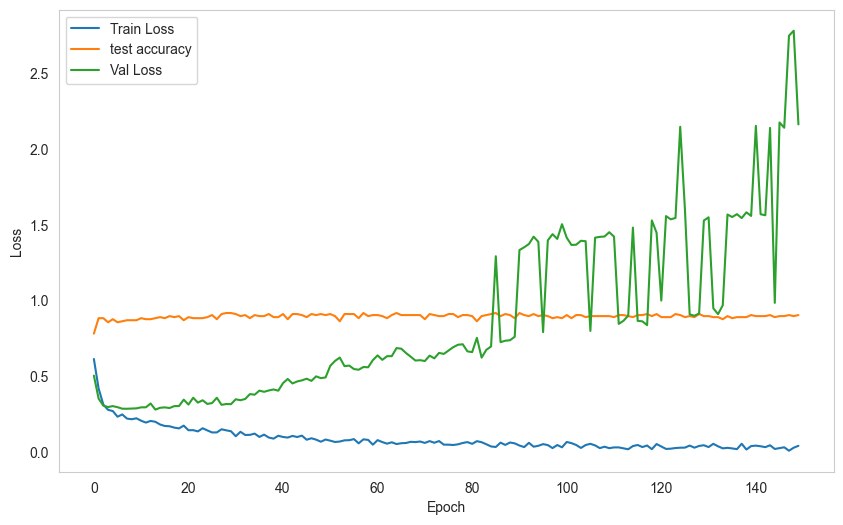

In [160]:
plt.figure(figsize=(10, 6))
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_acc"], label="test accuracy")
plt.plot(trainer.logger.metrics["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

La value loss qui augmente indique un Sur-apprentissage. On envisage de rajouter des prédicteurs. 

In [161]:
y_binary = (data["cnt"] > 4000).astype(int)  # 1 si >4000, 0 sinon
y = y_binary.values.reshape(-1, 1)  # ✅ Conversion en array numpy
test_cat = ["weathersit", "workingday", 'yr', 'season', 'mnth', 'holiday', 'weekday']

X_cat = pd.get_dummies(X_factor.loc[:, test_cat], drop_first=True)
X_final = pd.concat([pd.DataFrame(X_scaled), X_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,  
    stratify=data['mnth'], 
    test_size=0.2,
    random_state=123
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape :", x_test.shape)

x_train shape: torch.Size([584, 28])
y_train shape: torch.Size([584, 1])
x_test shape : torch.Size([147, 28])


In [162]:
model = BikeModelBinaryClassification(x_train.shape[1], lr=1e-3)
summary = ModelSummary(model)
print(summary)

  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | layers  | Sequential | 5.2 K  | train
1 | loss_fn | BCELoss    | 0      | train
-----------------------------------------------
5.2 K     Trainable params
0         Non-trainable params
5.2 K     Total params
0.021     Total estimated model params size (MB)
12        Modules in train mode
0         Modules in eval mode


In [163]:
trainer = pl.Trainer(
    max_epochs=50,
    logger=SimpleLogger(),
    enable_checkpointing=False,
    log_every_n_steps=1,
)  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores


In [164]:
trainer.fit(model, train_loader, test_loader)


  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | layers  | Sequential | 5.2 K  | train
1 | loss_fn | BCELoss    | 0      | train
-----------------------------------------------
5.2 K     Trainable params
0         Non-trainable params
5.2 K     Total params
0.021     Total estimated model params size (MB)
12        Modules in train mode
0         Modules in eval mode


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 49: 100%|██████████| 73/73 [00:00<00:00, 167.35it/s, v_num=Data, val_loss=0.403, val_acc=0.871, train_loss=0.109, train_acc=0.971] 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 73/73 [00:00<00:00, 166.76it/s, v_num=Data, val_loss=0.403, val_acc=0.871, train_loss=0.109, train_acc=0.971]


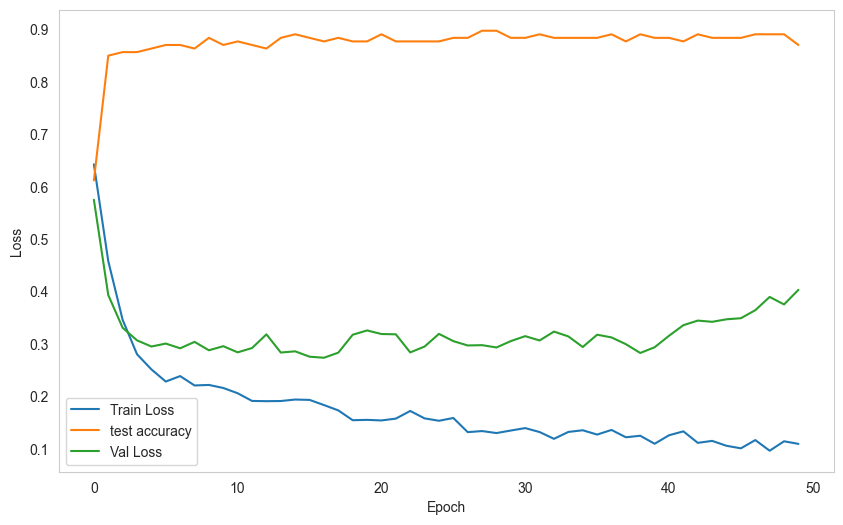

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_acc"], label="test accuracy")
plt.plot(trainer.logger.metrics["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

Difficulté après 50 epoch, on remarque que le modèle diverge. Dans ce cas de figure on préfère le modèle qui fait une régression pour prédire le nombre de vélo loué et après on applique le seuil de 4,000. 

# Question 5
Régression logistique


In [148]:
x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,
    stratify=stratify_columns,
    test_size=0.2,
    random_state=123
)

In [149]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [151]:
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test_bin, y_pred):.3f}")
print(classification_report(y_test_bin, y_pred))

Accuracy: 0.878
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        51
           1       0.91      0.90      0.91        96

    accuracy                           0.88       147
   macro avg       0.86      0.87      0.87       147
weighted avg       0.88      0.88      0.88       147



On trouve des résultats similaires entre les 2 premiers modèles de régression et le modèle classique de régression logistique. 

# **Partie 2 : Série temporelle**

INFORMATIONS DE BASE
Période couverte: de 2011-01-01 00:00:00 à 2012-12-31 00:00:00
Nombre de jours: 731
Valeurs manquantes dans cnt: 0

Statistiques descriptives de cnt:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


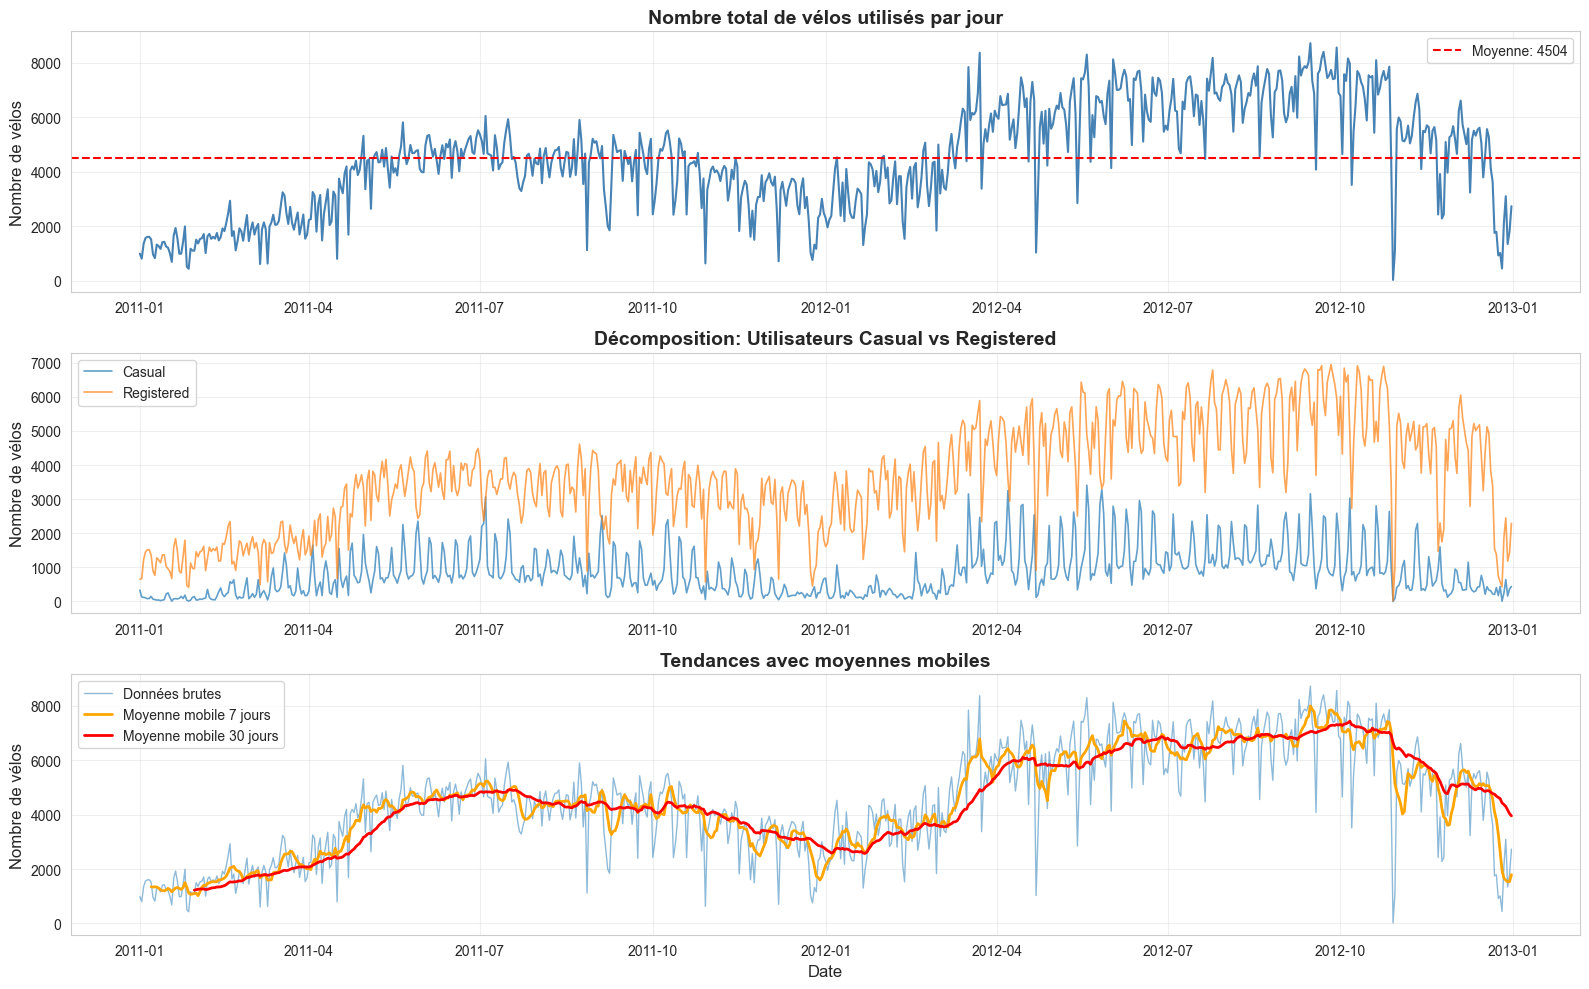

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

data['dteday'] = pd.to_datetime(data['dteday'])
data = data.sort_values('dteday')
data.set_index('dteday', inplace=True)

print("="*60)
print("INFORMATIONS DE BASE")
print("="*60)
print(f"Période couverte: de {data.index.min()} à {data.index.max()}")
print(f"Nombre de jours: {len(data)}")
print(f"Valeurs manquantes dans cnt: {data['cnt'].isna().sum()}")
print(f"\nStatistiques descriptives de cnt:")
print(data['cnt'].describe())

fig, axes = plt.subplots(3, 1, figsize=(16, 10))

# Graphique principal
axes[0].plot(data.index, data['cnt'], linewidth=1.5, color='steelblue')
axes[0].set_title('Nombre total de vélos utilisés par jour', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Nombre de vélos', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=data['cnt'].mean(), color='red', linestyle='--', 
                label=f'Moyenne: {data["cnt"].mean():.0f}')
axes[0].legend()

# Casual vs Registered
if 'casual' in data.columns and 'registered' in data.columns:
    axes[1].plot(data.index, data['casual'], label='Casual', 
                 linewidth=1.2, alpha=0.7)
    axes[1].plot(data.index, data['registered'], label='Registered', 
                 linewidth=1.2, alpha=0.7)
    axes[1].set_title('Décomposition: Utilisateurs Casual vs Registered', 
                      fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Nombre de vélos', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

# Moyennes mobiles
axes[2].plot(data.index, data['cnt'], linewidth=1, 
             alpha=0.5, label='Données brutes')
axes[2].plot(data.index, data['cnt'].rolling(window=7).mean(), 
             linewidth=2, label='Moyenne mobile 7 jours', color='orange')
axes[2].plot(data.index, data['cnt'].rolling(window=30).mean(), 
             linewidth=2, label='Moyenne mobile 30 jours', color='red')
axes[2].set_title('Tendances avec moyennes mobiles', 
                  fontsize=14, fontweight='bold')
axes[2].set_ylabel('Nombre de vélos', fontsize=12)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Il y a de la saisonnalité, et une tendance haussière. Il faut donc appliquer une différentiation de lag 1 et une autre sur 12 mois. 

In [ ]:
data_reset = data.reset_index(drop = True)
print(data_reset)

     instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0          1       1   0     1        0        6           0           2   
1          2       1   0     1        0        0           0           2   
2          3       1   0     1        0        1           1           1   
3          4       1   0     1        0        2           1           1   
4          5       1   0     1        0        3           1           1   
..       ...     ...  ..   ...      ...      ...         ...         ...   
726      727       1   1    12        0        4           1           2   
727      728       1   1    12        0        5           1           2   
728      729       1   1    12        0        6           0           2   
729      730       1   1    12        0        0           0           1   
730      731       1   1    12        0        1           1           2   

         temp     atemp       hum  windspeed  casual  registered   cnt  
0    0.344167 

In [187]:
X_final

,0,1,2,weathersit_2,weathersit_3,workingday_1,yr_1,season_2,season_3,season_4,...,mnth_10,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,-0.826662,1.250171,-0.387892,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.721095,0.479113,0.749602,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.634657,-1.339274,0.746632,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.614780,-0.263182,-0.389829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.467414,-1.341494,-0.046307,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,-1.318665,0.175807,2.061426,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
727,-1.323224,-0.266238,-0.452131,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
728,-1.323224,0.878392,-0.853552,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
729,-1.309558,-1.015664,2.069444,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [231]:
test_cat = ["weathersit", "workingday", 'yr']
X_final_new = X_final.iloc[:, 0:7]
data_mat = pd.concat([X_final, data_reset["cnt"]], axis=1)
print(data_mat.head())
data_mat = data_mat.values


          0         1         2  weathersit_2  weathersit_3  workingday_1  \
0 -0.826662  1.250171 -0.387892           1.0           0.0           0.0   
1 -0.721095  0.479113  0.749602           1.0           0.0           0.0   
2 -1.634657 -1.339274  0.746632           0.0           0.0           1.0   
3 -1.614780 -0.263182 -0.389829           0.0           0.0           1.0   
4 -1.467414 -1.341494 -0.046307           0.0           0.0           1.0   

   yr_1  season_2  season_3  season_4  ...  mnth_11  mnth_12  holiday_1  \
0   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   
1   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   
2   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   
3   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   
4   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   

   weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6   cnt  
0        0

In [232]:
time_steps = data.shape[0]
samples = []
target = []
length = 35  # sequence length
test_size = 150

for i in range(time_steps - length):
    sample = data_mat[i : i + length, :28]

    outcome = data_mat[i + length, 28]
    samples.append(sample)
    target.append(outcome)

# Convert to arrays
samples = np.array(samples)
target = np.array(target)

# Train/test split
x_train = samples[:-test_size]
x_test = samples[-test_size:]
y_train = target[:-test_size]
y_test = target[-test_size:]

print("x_train:", x_train.shape)
print("x_test :", x_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


x_train: (546, 35, 28)
x_test : (150, 35, 28)
y_train: (546,)
y_test : (150,)


In [233]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=False)

Il faut découper nos données en périodes distinctes. 

In [1]:
class RNNModel(pl.LightningModule):
    def __init__(self, input_size, hidden_size, dense1, dense2, dense3):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            batch_first=True,
            nonlinearity="relu",
        )
        
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(hidden_size, dense1)
        self.fc2 = nn.Linear(dense1, dense2)
        self.fc3 = nn.Linear(dense2, dense3)
        self.out = nn.Linear(dense3, 1)
        self.relu = nn.ReLU()
        self.criterion = nn.MSELoss()
        self.save_hyperparameters()

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]  # take the last hidden state
        out = self.dropout(self.relu(self.fc1(out)))
        out = self.dropout(self.relu(self.fc2(out)))
        out = self.dropout(self.relu(self.fc3(out)))
        out = self.out(out)
        return out

    def training_step(self, batch, batch_idx):
        input_seq, prediction = batch
        outputs = self(input_seq)
        loss = self.criterion(outputs, prediction)
        self.log("train_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        input_seq, prediction = batch
        outputs = self(input_seq)
        loss = self.criterion(outputs, prediction)
        self.log("val_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        return [optimizer]


input_size = 28
hidden_size = 64
model = RNNModel(input_size, hidden_size,64, 16, 8)
print(model)

NameError: name 'pl' is not defined

In [267]:
x_train_tensor.shape

torch.Size([546, 35, 28])

In [268]:
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor="val_loss", min_delta=0.00, patience=10, verbose=True, mode="min"
)
checkpoint_callback = ModelCheckpoint(
    save_top_k=1, monitor="val_loss", mode="min", verbose=True
)
trainer = pl.Trainer(
    max_epochs=70,
    logger=SimpleLogger(),
    enable_checkpointing=True,
    check_val_every_n_epoch=1,
    callbacks=[
        # early_stopping, # Early stopping
        checkpoint_callback,  # Save model with best val_loss
    ],
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


In [269]:
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:751: Checkpoint directory c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\SimpleLogger\MajeureData\checkpoints exists and is not empty.

  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | rnn       | RNN     | 20.2 K | train
1 | dropout   | Dropout | 0      | train
2 | fc1       | Linear  | 8.3 K  | train
3 | fc2       | Linear  | 8.3 K  | train
4 | fc3       | Linear  | 16.5 K | train
5 | fc4       | Linear  | 8.3 K  | train
6 | out       | Linear  | 65     | train
7 | relu      | ReLU    | 0      | train
8 | criterion | MSELoss | 0      | train
----------------------------------------------
61.6 K    Trainable params
0         Non-trainable params
61.6 K    Total params
0.247     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:310: The number of training batches (11) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0: 100%|██████████| 11/11 [00:00<00:00, 43.48it/s, v_num=Data, val_loss=3.84e+7, train_loss=2.15e+7]

Epoch 0, global step 11: 'val_loss' reached 38363948.00000 (best 38363948.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=0-step=11-v1.ckpt' as top 1


Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 48.76it/s, v_num=Data, val_loss=3.82e+6, train_loss=4.01e+7]

Epoch 1, global step 22: 'val_loss' reached 3820481.75000 (best 3820481.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=1-step=22.ckpt' as top 1


Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 49.88it/s, v_num=Data, val_loss=3.83e+7, train_loss=1.78e+7]

Epoch 2, global step 33: 'val_loss' was not in top 1


Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 54.31it/s, v_num=Data, val_loss=3.84e+7, train_loss=2.15e+7]

Epoch 3, global step 44: 'val_loss' was not in top 1


Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 47.61it/s, v_num=Data, val_loss=3.84e+7, train_loss=2.15e+7]

Epoch 4, global step 55: 'val_loss' was not in top 1


Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 54.23it/s, v_num=Data, val_loss=3.84e+7, train_loss=2.15e+7]

Epoch 5, global step 66: 'val_loss' was not in top 1


Epoch 6: 100%|██████████| 11/11 [00:00<00:00, 52.28it/s, v_num=Data, val_loss=3.83e+7, train_loss=2.15e+7]

Epoch 6, global step 77: 'val_loss' was not in top 1


Epoch 7: 100%|██████████| 11/11 [00:00<00:00, 51.34it/s, v_num=Data, val_loss=3.83e+7, train_loss=2.15e+7]

Epoch 7, global step 88: 'val_loss' was not in top 1


Epoch 8: 100%|██████████| 11/11 [00:00<00:00, 74.69it/s, v_num=Data, val_loss=3.83e+7, train_loss=2.15e+7]

Epoch 8, global step 99: 'val_loss' was not in top 1


Epoch 9: 100%|██████████| 11/11 [00:00<00:00, 73.88it/s, v_num=Data, val_loss=3.82e+7, train_loss=2.15e+7]

Epoch 9, global step 110: 'val_loss' was not in top 1


Epoch 10: 100%|██████████| 11/11 [00:00<00:00, 73.79it/s, v_num=Data, val_loss=3.8e+7, train_loss=2.14e+7] 

Epoch 10, global step 121: 'val_loss' was not in top 1


Epoch 11: 100%|██████████| 11/11 [00:00<00:00, 60.16it/s, v_num=Data, val_loss=3.75e+7, train_loss=2.11e+7]

Epoch 11, global step 132: 'val_loss' was not in top 1


Epoch 12: 100%|██████████| 11/11 [00:00<00:00, 77.13it/s, v_num=Data, val_loss=3.6e+7, train_loss=2.06e+7] 

Epoch 12, global step 143: 'val_loss' was not in top 1


Epoch 13: 100%|██████████| 11/11 [00:00<00:00, 82.67it/s, v_num=Data, val_loss=1.9e+7, train_loss=1.77e+7] 

Epoch 13, global step 154: 'val_loss' was not in top 1


Epoch 14: 100%|██████████| 11/11 [00:00<00:00, 80.86it/s, v_num=Data, val_loss=9.1e+6, train_loss=4.73e+6] 

Epoch 14, global step 165: 'val_loss' was not in top 1


Epoch 15: 100%|██████████| 11/11 [00:00<00:00, 85.59it/s, v_num=Data, val_loss=6.69e+6, train_loss=2.91e+6]

Epoch 15, global step 176: 'val_loss' was not in top 1


Epoch 16: 100%|██████████| 11/11 [00:00<00:00, 77.23it/s, v_num=Data, val_loss=4.04e+6, train_loss=2.58e+6]

Epoch 16, global step 187: 'val_loss' was not in top 1


Epoch 17: 100%|██████████| 11/11 [00:00<00:00, 78.68it/s, v_num=Data, val_loss=2.65e+6, train_loss=1.93e+6]

Epoch 17, global step 198: 'val_loss' reached 2649689.50000 (best 2649689.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=17-step=198.ckpt' as top 1


Epoch 18: 100%|██████████| 11/11 [00:00<00:00, 77.08it/s, v_num=Data, val_loss=2.36e+6, train_loss=1.92e+6]

Epoch 18, global step 209: 'val_loss' reached 2360845.75000 (best 2360845.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=18-step=209-v1.ckpt' as top 1


Epoch 19: 100%|██████████| 11/11 [00:00<00:00, 65.14it/s, v_num=Data, val_loss=2.8e+6, train_loss=1.76e+6] 

Epoch 19, global step 220: 'val_loss' was not in top 1


Epoch 20: 100%|██████████| 11/11 [00:00<00:00, 80.55it/s, v_num=Data, val_loss=3.02e+6, train_loss=1.88e+6]

Epoch 20, global step 231: 'val_loss' was not in top 1


Epoch 21: 100%|██████████| 11/11 [00:00<00:00, 83.81it/s, v_num=Data, val_loss=3.25e+6, train_loss=1.68e+6] 

Epoch 21, global step 242: 'val_loss' was not in top 1


Epoch 22: 100%|██████████| 11/11 [00:00<00:00, 75.46it/s, v_num=Data, val_loss=3.16e+6, train_loss=1.74e+6]

Epoch 22, global step 253: 'val_loss' was not in top 1


Epoch 23: 100%|██████████| 11/11 [00:00<00:00, 83.47it/s, v_num=Data, val_loss=2.94e+6, train_loss=1.57e+6] 

Epoch 23, global step 264: 'val_loss' was not in top 1


Epoch 24: 100%|██████████| 11/11 [00:00<00:00, 80.38it/s, v_num=Data, val_loss=3.24e+6, train_loss=1.56e+6]

Epoch 24, global step 275: 'val_loss' was not in top 1


Epoch 25: 100%|██████████| 11/11 [00:00<00:00, 75.33it/s, v_num=Data, val_loss=2.6e+6, train_loss=1.61e+6] 

Epoch 25, global step 286: 'val_loss' was not in top 1


Epoch 26: 100%|██████████| 11/11 [00:00<00:00, 71.45it/s, v_num=Data, val_loss=2.47e+6, train_loss=1.62e+6]

Epoch 26, global step 297: 'val_loss' was not in top 1


Epoch 27: 100%|██████████| 11/11 [00:00<00:00, 82.03it/s, v_num=Data, val_loss=2.33e+6, train_loss=1.77e+6] 

Epoch 27, global step 308: 'val_loss' reached 2330781.75000 (best 2330781.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=27-step=308.ckpt' as top 1


Epoch 28: 100%|██████████| 11/11 [00:00<00:00, 69.39it/s, v_num=Data, val_loss=2.34e+6, train_loss=1.52e+6]

Epoch 28, global step 319: 'val_loss' was not in top 1


Epoch 29: 100%|██████████| 11/11 [00:00<00:00, 82.48it/s, v_num=Data, val_loss=2.36e+6, train_loss=1.49e+6] 

Epoch 29, global step 330: 'val_loss' was not in top 1


Epoch 30: 100%|██████████| 11/11 [00:00<00:00, 80.84it/s, v_num=Data, val_loss=2.35e+6, train_loss=1.24e+6]

Epoch 30, global step 341: 'val_loss' was not in top 1


Epoch 31: 100%|██████████| 11/11 [00:00<00:00, 80.95it/s, v_num=Data, val_loss=2.6e+6, train_loss=1.35e+6] 

Epoch 31, global step 352: 'val_loss' was not in top 1


Epoch 32: 100%|██████████| 11/11 [00:00<00:00, 76.23it/s, v_num=Data, val_loss=2.43e+6, train_loss=1.28e+6]

Epoch 32, global step 363: 'val_loss' was not in top 1


Epoch 33: 100%|██████████| 11/11 [00:00<00:00, 83.04it/s, v_num=Data, val_loss=2.48e+6, train_loss=1.24e+6] 

Epoch 33, global step 374: 'val_loss' was not in top 1


Epoch 34: 100%|██████████| 11/11 [00:00<00:00, 79.56it/s, v_num=Data, val_loss=2.36e+6, train_loss=1.29e+6]

Epoch 34, global step 385: 'val_loss' was not in top 1


Epoch 35: 100%|██████████| 11/11 [00:00<00:00, 82.57it/s, v_num=Data, val_loss=2.38e+6, train_loss=1.29e+6]

Epoch 35, global step 396: 'val_loss' was not in top 1


Epoch 36: 100%|██████████| 11/11 [00:00<00:00, 66.91it/s, v_num=Data, val_loss=2.6e+6, train_loss=1.33e+6] 

Epoch 36, global step 407: 'val_loss' was not in top 1


Epoch 37: 100%|██████████| 11/11 [00:00<00:00, 82.44it/s, v_num=Data, val_loss=2.42e+6, train_loss=1.32e+6]

Epoch 37, global step 418: 'val_loss' was not in top 1


Epoch 38: 100%|██████████| 11/11 [00:00<00:00, 81.65it/s, v_num=Data, val_loss=2.59e+6, train_loss=1.16e+6] 

Epoch 38, global step 429: 'val_loss' was not in top 1


Epoch 39: 100%|██████████| 11/11 [00:00<00:00, 82.20it/s, v_num=Data, val_loss=2.49e+6, train_loss=1.03e+6] 

Epoch 39, global step 440: 'val_loss' was not in top 1


Epoch 40: 100%|██████████| 11/11 [00:00<00:00, 79.76it/s, v_num=Data, val_loss=2.68e+6, train_loss=1.1e+6] 

Epoch 40, global step 451: 'val_loss' was not in top 1


Epoch 41: 100%|██████████| 11/11 [00:00<00:00, 76.85it/s, v_num=Data, val_loss=2.45e+6, train_loss=1.17e+6]

Epoch 41, global step 462: 'val_loss' was not in top 1


Epoch 42: 100%|██████████| 11/11 [00:00<00:00, 60.97it/s, v_num=Data, val_loss=2.46e+6, train_loss=1.19e+6]

Epoch 42, global step 473: 'val_loss' was not in top 1


Epoch 43: 100%|██████████| 11/11 [00:00<00:00, 85.74it/s, v_num=Data, val_loss=2.47e+6, train_loss=1.14e+6] 

Epoch 43, global step 484: 'val_loss' was not in top 1


Epoch 44: 100%|██████████| 11/11 [00:00<00:00, 66.05it/s, v_num=Data, val_loss=2.47e+6, train_loss=1.06e+6]

Epoch 44, global step 495: 'val_loss' was not in top 1


Epoch 45: 100%|██████████| 11/11 [00:00<00:00, 84.70it/s, v_num=Data, val_loss=2.43e+6, train_loss=1.11e+6] 

Epoch 45, global step 506: 'val_loss' was not in top 1


Epoch 46: 100%|██████████| 11/11 [00:00<00:00, 79.47it/s, v_num=Data, val_loss=2.65e+6, train_loss=1.16e+6]

Epoch 46, global step 517: 'val_loss' was not in top 1


Epoch 47: 100%|██████████| 11/11 [00:00<00:00, 80.76it/s, v_num=Data, val_loss=2.64e+6, train_loss=1.1e+6] 

Epoch 47, global step 528: 'val_loss' was not in top 1


Epoch 48: 100%|██████████| 11/11 [00:00<00:00, 79.01it/s, v_num=Data, val_loss=2.64e+6, train_loss=1.04e+6]

Epoch 48, global step 539: 'val_loss' was not in top 1


Epoch 49: 100%|██████████| 11/11 [00:00<00:00, 79.83it/s, v_num=Data, val_loss=2.62e+6, train_loss=1.02e+6]

Epoch 49, global step 550: 'val_loss' was not in top 1


Epoch 50: 100%|██████████| 11/11 [00:00<00:00, 81.60it/s, v_num=Data, val_loss=2.78e+6, train_loss=1.09e+6] 

Epoch 50, global step 561: 'val_loss' was not in top 1


Epoch 51: 100%|██████████| 11/11 [00:00<00:00, 78.82it/s, v_num=Data, val_loss=3.07e+6, train_loss=1.07e+6]

Epoch 51, global step 572: 'val_loss' was not in top 1


Epoch 52: 100%|██████████| 11/11 [00:00<00:00, 79.50it/s, v_num=Data, val_loss=3.68e+6, train_loss=1.16e+6]

Epoch 52, global step 583: 'val_loss' was not in top 1


Epoch 53: 100%|██████████| 11/11 [00:00<00:00, 64.60it/s, v_num=Data, val_loss=3.21e+6, train_loss=1.2e+6] 

Epoch 53, global step 594: 'val_loss' was not in top 1


Epoch 54: 100%|██████████| 11/11 [00:00<00:00, 81.05it/s, v_num=Data, val_loss=2.8e+6, train_loss=9.58e+5]

Epoch 54, global step 605: 'val_loss' was not in top 1


Epoch 55: 100%|██████████| 11/11 [00:00<00:00, 78.05it/s, v_num=Data, val_loss=2.45e+6, train_loss=1.02e+6]

Epoch 55, global step 616: 'val_loss' was not in top 1


Epoch 56: 100%|██████████| 11/11 [00:00<00:00, 79.71it/s, v_num=Data, val_loss=2.56e+6, train_loss=1.09e+6]

Epoch 56, global step 627: 'val_loss' was not in top 1


Epoch 57: 100%|██████████| 11/11 [00:00<00:00, 75.42it/s, v_num=Data, val_loss=2.86e+6, train_loss=9.58e+5]

Epoch 57, global step 638: 'val_loss' was not in top 1


Epoch 58: 100%|██████████| 11/11 [00:00<00:00, 73.51it/s, v_num=Data, val_loss=2.55e+6, train_loss=9.19e+5]

Epoch 58, global step 649: 'val_loss' was not in top 1


Epoch 59: 100%|██████████| 11/11 [00:00<00:00, 80.93it/s, v_num=Data, val_loss=2.45e+6, train_loss=1.08e+6] 

Epoch 59, global step 660: 'val_loss' was not in top 1


Epoch 60: 100%|██████████| 11/11 [00:00<00:00, 81.68it/s, v_num=Data, val_loss=2.68e+6, train_loss=9.98e+5]

Epoch 60, global step 671: 'val_loss' was not in top 1


Epoch 61: 100%|██████████| 11/11 [00:00<00:00, 67.43it/s, v_num=Data, val_loss=2.64e+6, train_loss=8.83e+5]

Epoch 61, global step 682: 'val_loss' was not in top 1


Epoch 62: 100%|██████████| 11/11 [00:00<00:00, 80.89it/s, v_num=Data, val_loss=2.46e+6, train_loss=9.08e+5]

Epoch 62, global step 693: 'val_loss' was not in top 1


Epoch 63: 100%|██████████| 11/11 [00:00<00:00, 78.91it/s, v_num=Data, val_loss=2.66e+6, train_loss=1e+6]   

Epoch 63, global step 704: 'val_loss' was not in top 1


Epoch 64: 100%|██████████| 11/11 [00:00<00:00, 71.60it/s, v_num=Data, val_loss=2.63e+6, train_loss=9.21e+5]

Epoch 64, global step 715: 'val_loss' was not in top 1


Epoch 65: 100%|██████████| 11/11 [00:00<00:00, 82.50it/s, v_num=Data, val_loss=2.69e+6, train_loss=8.5e+5]  

Epoch 65, global step 726: 'val_loss' was not in top 1


Epoch 66: 100%|██████████| 11/11 [00:00<00:00, 81.89it/s, v_num=Data, val_loss=2.5e+6, train_loss=8.86e+5] 

Epoch 66, global step 737: 'val_loss' was not in top 1


Epoch 67: 100%|██████████| 11/11 [00:00<00:00, 78.00it/s, v_num=Data, val_loss=2.76e+6, train_loss=9.07e+5]

Epoch 67, global step 748: 'val_loss' was not in top 1


Epoch 68: 100%|██████████| 11/11 [00:00<00:00, 78.74it/s, v_num=Data, val_loss=3.01e+6, train_loss=9.38e+5]

Epoch 68, global step 759: 'val_loss' was not in top 1


Epoch 69: 100%|██████████| 11/11 [00:00<00:00, 59.58it/s, v_num=Data, val_loss=2.7e+6, train_loss=8.35e+5] 

Epoch 69, global step 770: 'val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=70` reached.


Epoch 69: 100%|██████████| 11/11 [00:00<00:00, 58.98it/s, v_num=Data, val_loss=2.7e+6, train_loss=8.35e+5]


In [270]:
best_model = RNNModel.load_from_checkpoint(
    checkpoint_path=checkpoint_callback.best_model_path
)
best_model.eval()


RNNModel(
  (rnn): RNN(28, 128, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (criterion): MSELoss()
)

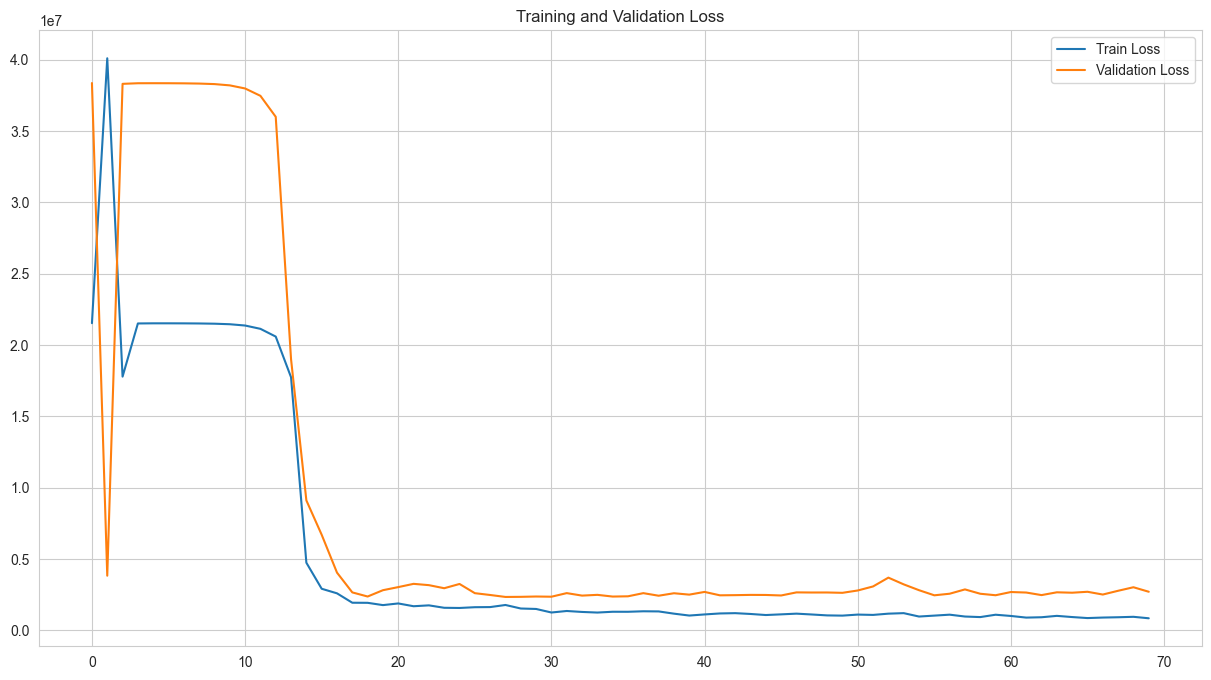

In [271]:
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
# plt.yscale("log")
plt.show()

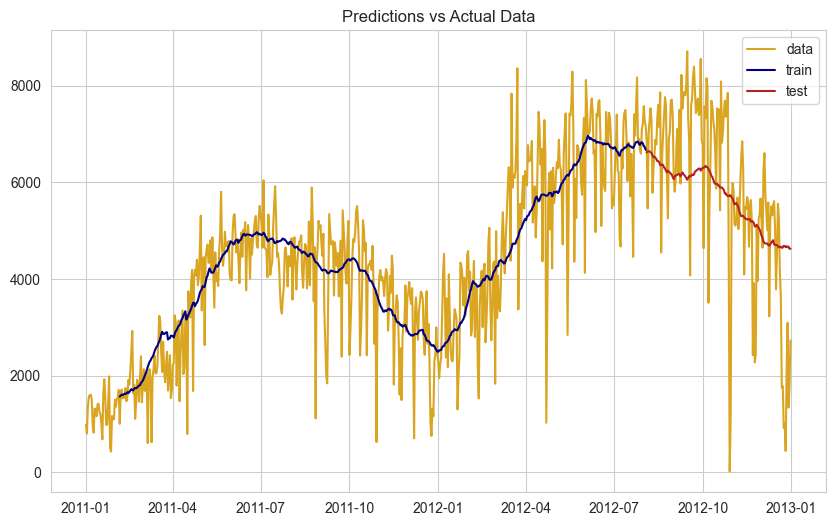

In [272]:
model.eval()
with torch.no_grad():
    train_preds = best_model(x_train_tensor).cpu().numpy()
    test_preds = best_model(x_test_tensor).cpu().numpy()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data["cnt"], c="goldenrod", label="data")
plt.plot(data.iloc[length : -len(y_test)].index, train_preds, c="navy", label="train")
plt.plot(data.iloc[-len(y_test) :].index, test_preds, c="firebrick", label="test")
plt.legend()
plt.title("Predictions vs Actual Data")
plt.show()

In [ ]:

class LSTMModel(pl.LightningModule):
    def __init__(self, input_size, hidden_size, num_layers=2, dropout=0.3):
        super(LSTMModel, self).__init__()
        
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 1)
        )
        
        self.criterion = nn.MSELoss()
        self.save_hyperparameters()

    def forward(self, x):
        out, (hidden, cell) = self.lstm(x)
        out = out[:, -1, :]  # Dernier timestep
        out = self.fc(out)
        return out
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        
        rmse = torch.sqrt(loss)
        
        self.log("train_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log("train_rmse", rmse, prog_bar=False, on_step=False, on_epoch=True)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.mse(yhat, y)
        self.log(f"val_loss", loss, on_epoch=True, on_step=False, prog_bar=True)
        self.log("val_rmse", torch.sqrt(loss), prog_bar=False, on_step=False, on_epoch=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return [optimizer]
    
model = LSTMModel(input_size=7, hidden_size=128, num_layers=6, dropout=0.3)


In [226]:
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor="val_loss", min_delta=0.00, patience=10, verbose=True, mode="min"
)
checkpoint_callback = ModelCheckpoint(
    save_top_k=1, monitor="val_loss", mode="min", verbose=True
)
trainer = pl.Trainer(
    max_epochs=50,
    logger=SimpleLogger(),
    enable_checkpointing=True,
    check_val_every_n_epoch=1,
    callbacks=[
        # early_stopping, # Early stopping
        checkpoint_callback,  # Save model with best val_loss
    ],
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


In [227]:
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:751: Checkpoint directory c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\SimpleLogger\MajeureData\checkpoints exists and is not empty.

  | Name      | Type       | Params | Mode 
-------------------------------------------------
0 | lstm      | LSTM       | 202 K  | train
1 | fc        | Sequential | 26.9 K | train
2 | criterion | MSELoss    | 0      | train
-------------------------------------------------
229 K     Trainable params
0         Non-trainable params
229 K     Total params
0.916     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:310: The number of training batches (11) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0: 100%|██████████| 11/11 [00:00<00:00, 30.97it/s, v_num=Data, val_loss=3.84e+7, val_mae=5.91e+3, train_loss=2.15e+7, train_mae=4.33e+3]

Epoch 0, global step 11: 'val_loss' reached 38366364.00000 (best 38366364.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=0-step=11-v1.ckpt' as top 1


Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 31.10it/s, v_num=Data, val_loss=3.83e+7, val_mae=5.9e+3, train_loss=2.15e+7, train_mae=4.32e+3] 

Epoch 1, global step 22: 'val_loss' reached 38322524.00000 (best 38322524.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=1-step=22.ckpt' as top 1


Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 31.48it/s, v_num=Data, val_loss=3.82e+7, val_mae=5.89e+3, train_loss=2.15e+7, train_mae=4.32e+3]

Epoch 2, global step 33: 'val_loss' reached 38160928.00000 (best 38160928.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=2-step=33.ckpt' as top 1


Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 33.53it/s, v_num=Data, val_loss=3.77e+7, val_mae=5.85e+3, train_loss=2.12e+7, train_mae=4.29e+3]

Epoch 3, global step 44: 'val_loss' reached 37685956.00000 (best 37685956.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=3-step=44.ckpt' as top 1


Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 38.48it/s, v_num=Data, val_loss=3.65e+7, val_mae=5.75e+3, train_loss=2.07e+7, train_mae=4.23e+3]

Epoch 4, global step 55: 'val_loss' reached 36522116.00000 (best 36522116.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=4-step=55.ckpt' as top 1


Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 42.93it/s, v_num=Data, val_loss=3.41e+7, val_mae=5.54e+3, train_loss=1.95e+7, train_mae=4.08e+3]

Epoch 5, global step 66: 'val_loss' reached 34070364.00000 (best 34070364.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=5-step=66.ckpt' as top 1


Epoch 6: 100%|██████████| 11/11 [00:00<00:00, 42.57it/s, v_num=Data, val_loss=2.96e+7, val_mae=5.13e+3, train_loss=1.72e+7, train_mae=3.78e+3]

Epoch 6, global step 77: 'val_loss' reached 29620500.00000 (best 29620500.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=6-step=77.ckpt' as top 1


Epoch 7: 100%|██████████| 11/11 [00:00<00:00, 43.45it/s, v_num=Data, val_loss=2.27e+7, val_mae=4.44e+3, train_loss=1.33e+7, train_mae=3.23e+3]

Epoch 7, global step 88: 'val_loss' reached 22681354.00000 (best 22681354.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=7-step=88-v1.ckpt' as top 1


Epoch 8: 100%|██████████| 11/11 [00:00<00:00, 43.14it/s, v_num=Data, val_loss=1.42e+7, val_mae=3.48e+3, train_loss=8.47e+6, train_mae=2.46e+3]

Epoch 8, global step 99: 'val_loss' reached 14209056.00000 (best 14209056.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=8-step=99.ckpt' as top 1


Epoch 9: 100%|██████████| 11/11 [00:00<00:00, 41.25it/s, v_num=Data, val_loss=7.39e+6, val_mae=2.45e+3, train_loss=4.75e+6, train_mae=1.74e+3]

Epoch 9, global step 110: 'val_loss' reached 7391578.50000 (best 7391578.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=9-step=110-v1.ckpt' as top 1


Epoch 10: 100%|██████████| 11/11 [00:00<00:00, 43.84it/s, v_num=Data, val_loss=5.22e+6, val_mae=2e+3, train_loss=3.98e+6, train_mae=1.58e+3]   

Epoch 10, global step 121: 'val_loss' reached 5220626.50000 (best 5220626.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\NN\\SimpleLogger\\MajeureData\\checkpoints\\epoch=10-step=121-v1.ckpt' as top 1


Epoch 11: 100%|██████████| 11/11 [00:00<00:00, 44.36it/s, v_num=Data, val_loss=6.06e+6, val_mae=2.19e+3, train_loss=3.89e+6, train_mae=1.6e+3] 

Epoch 11, global step 132: 'val_loss' was not in top 1


Epoch 12: 100%|██████████| 11/11 [00:00<00:00, 42.63it/s, v_num=Data, val_loss=6.88e+6, val_mae=2.36e+3, train_loss=3.73e+6, train_mae=1.54e+3]

Epoch 12, global step 143: 'val_loss' was not in top 1


Epoch 13: 100%|██████████| 11/11 [00:00<00:00, 43.55it/s, v_num=Data, val_loss=6.79e+6, val_mae=2.34e+3, train_loss=3.67e+6, train_mae=1.54e+3]

Epoch 13, global step 154: 'val_loss' was not in top 1


Epoch 14: 100%|██████████| 11/11 [00:00<00:00, 45.02it/s, v_num=Data, val_loss=6.71e+6, val_mae=2.32e+3, train_loss=3.6e+6, train_mae=1.51e+3] 

Epoch 14, global step 165: 'val_loss' was not in top 1


Epoch 15: 100%|██████████| 11/11 [00:00<00:00, 39.53it/s, v_num=Data, val_loss=6.44e+6, val_mae=2.27e+3, train_loss=3.64e+6, train_mae=1.51e+3]

Epoch 15, global step 176: 'val_loss' was not in top 1


Epoch 16: 100%|██████████| 11/11 [00:00<00:00, 41.49it/s, v_num=Data, val_loss=6.55e+6, val_mae=2.29e+3, train_loss=3.87e+6, train_mae=1.59e+3]

Epoch 16, global step 187: 'val_loss' was not in top 1


Epoch 17: 100%|██████████| 11/11 [00:00<00:00, 44.96it/s, v_num=Data, val_loss=6.71e+6, val_mae=2.32e+3, train_loss=3.71e+6, train_mae=1.54e+3]

Epoch 17, global step 198: 'val_loss' was not in top 1


Epoch 18: 100%|██████████| 11/11 [00:00<00:00, 42.43it/s, v_num=Data, val_loss=7.08e+6, val_mae=2.39e+3, train_loss=3.86e+6, train_mae=1.57e+3]

Epoch 18, global step 209: 'val_loss' was not in top 1


Epoch 19: 100%|██████████| 11/11 [00:00<00:00, 44.37it/s, v_num=Data, val_loss=6.51e+6, val_mae=2.28e+3, train_loss=3.66e+6, train_mae=1.55e+3]

Epoch 19, global step 220: 'val_loss' was not in top 1


Epoch 20: 100%|██████████| 11/11 [00:00<00:00, 42.73it/s, v_num=Data, val_loss=6.42e+6, val_mae=2.27e+3, train_loss=3.62e+6, train_mae=1.52e+3]

Epoch 20, global step 231: 'val_loss' was not in top 1


Epoch 21: 100%|██████████| 11/11 [00:00<00:00, 42.98it/s, v_num=Data, val_loss=6.67e+6, val_mae=2.32e+3, train_loss=3.95e+6, train_mae=1.62e+3]

Epoch 21, global step 242: 'val_loss' was not in top 1


Epoch 22: 100%|██████████| 11/11 [00:00<00:00, 42.32it/s, v_num=Data, val_loss=6.83e+6, val_mae=2.35e+3, train_loss=4.06e+6, train_mae=1.63e+3]

Epoch 22, global step 253: 'val_loss' was not in top 1


Epoch 23: 100%|██████████| 11/11 [00:00<00:00, 43.97it/s, v_num=Data, val_loss=6.75e+6, val_mae=2.33e+3, train_loss=3.87e+6, train_mae=1.59e+3]

Epoch 23, global step 264: 'val_loss' was not in top 1


Epoch 24: 100%|██████████| 11/11 [00:00<00:00, 44.15it/s, v_num=Data, val_loss=6.59e+6, val_mae=2.3e+3, train_loss=3.65e+6, train_mae=1.54e+3] 

Epoch 24, global step 275: 'val_loss' was not in top 1


Epoch 25: 100%|██████████| 11/11 [00:00<00:00, 41.91it/s, v_num=Data, val_loss=6.56e+6, val_mae=2.29e+3, train_loss=3.8e+6, train_mae=1.58e+3] 

Epoch 25, global step 286: 'val_loss' was not in top 1


Epoch 26: 100%|██████████| 11/11 [00:00<00:00, 43.35it/s, v_num=Data, val_loss=6.66e+6, val_mae=2.31e+3, train_loss=3.68e+6, train_mae=1.53e+3]

Epoch 26, global step 297: 'val_loss' was not in top 1


Epoch 27: 100%|██████████| 11/11 [00:00<00:00, 42.13it/s, v_num=Data, val_loss=6.84e+6, val_mae=2.35e+3, train_loss=4.01e+6, train_mae=1.59e+3]

Epoch 27, global step 308: 'val_loss' was not in top 1


Epoch 28: 100%|██████████| 11/11 [00:00<00:00, 43.92it/s, v_num=Data, val_loss=6.57e+6, val_mae=2.3e+3, train_loss=3.83e+6, train_mae=1.57e+3] 

Epoch 28, global step 319: 'val_loss' was not in top 1


Epoch 29: 100%|██████████| 11/11 [00:00<00:00, 42.97it/s, v_num=Data, val_loss=6.44e+6, val_mae=2.27e+3, train_loss=3.89e+6, train_mae=1.59e+3]

Epoch 29, global step 330: 'val_loss' was not in top 1


Epoch 30: 100%|██████████| 11/11 [00:00<00:00, 43.29it/s, v_num=Data, val_loss=6.57e+6, val_mae=2.3e+3, train_loss=3.9e+6, train_mae=1.58e+3]  

Epoch 30, global step 341: 'val_loss' was not in top 1


Epoch 31: 100%|██████████| 11/11 [00:00<00:00, 43.63it/s, v_num=Data, val_loss=6.6e+6, val_mae=2.3e+3, train_loss=3.91e+6, train_mae=1.59e+3]

Epoch 31, global step 352: 'val_loss' was not in top 1


Epoch 32: 100%|██████████| 11/11 [00:00<00:00, 44.13it/s, v_num=Data, val_loss=6.74e+6, val_mae=2.33e+3, train_loss=3.78e+6, train_mae=1.56e+3]

Epoch 32, global step 363: 'val_loss' was not in top 1


Epoch 33: 100%|██████████| 11/11 [00:00<00:00, 41.62it/s, v_num=Data, val_loss=6.84e+6, val_mae=2.35e+3, train_loss=3.64e+6, train_mae=1.54e+3]

Epoch 33, global step 374: 'val_loss' was not in top 1


Epoch 34: 100%|██████████| 11/11 [00:00<00:00, 44.69it/s, v_num=Data, val_loss=6.8e+6, val_mae=2.34e+3, train_loss=3.69e+6, train_mae=1.57e+3] 

Epoch 34, global step 385: 'val_loss' was not in top 1


Epoch 35: 100%|██████████| 11/11 [00:00<00:00, 44.24it/s, v_num=Data, val_loss=6.73e+6, val_mae=2.33e+3, train_loss=3.77e+6, train_mae=1.54e+3]

Epoch 35, global step 396: 'val_loss' was not in top 1


Epoch 36: 100%|██████████| 11/11 [00:00<00:00, 43.71it/s, v_num=Data, val_loss=6.68e+6, val_mae=2.32e+3, train_loss=3.89e+6, train_mae=1.62e+3]

Epoch 36, global step 407: 'val_loss' was not in top 1


Epoch 37: 100%|██████████| 11/11 [00:00<00:00, 45.31it/s, v_num=Data, val_loss=6.59e+6, val_mae=2.3e+3, train_loss=3.53e+6, train_mae=1.49e+3] 

Epoch 37, global step 418: 'val_loss' was not in top 1


Epoch 38: 100%|██████████| 11/11 [00:00<00:00, 42.97it/s, v_num=Data, val_loss=6.65e+6, val_mae=2.31e+3, train_loss=3.85e+6, train_mae=1.58e+3]

Epoch 38, global step 429: 'val_loss' was not in top 1


Epoch 39: 100%|██████████| 11/11 [00:00<00:00, 44.93it/s, v_num=Data, val_loss=6.61e+6, val_mae=2.3e+3, train_loss=3.8e+6, train_mae=1.59e+3]  

Epoch 39, global step 440: 'val_loss' was not in top 1


Epoch 40: 100%|██████████| 11/11 [00:00<00:00, 45.32it/s, v_num=Data, val_loss=6.73e+6, val_mae=2.33e+3, train_loss=3.7e+6, train_mae=1.56e+3]

Epoch 40, global step 451: 'val_loss' was not in top 1


Epoch 41: 100%|██████████| 11/11 [00:00<00:00, 42.47it/s, v_num=Data, val_loss=6.8e+6, val_mae=2.34e+3, train_loss=3.67e+6, train_mae=1.53e+3]

Epoch 41, global step 462: 'val_loss' was not in top 1


Epoch 42: 100%|██████████| 11/11 [00:00<00:00, 41.23it/s, v_num=Data, val_loss=6.86e+6, val_mae=2.35e+3, train_loss=3.75e+6, train_mae=1.56e+3]

Epoch 42, global step 473: 'val_loss' was not in top 1


Epoch 43: 100%|██████████| 11/11 [00:00<00:00, 44.64it/s, v_num=Data, val_loss=6.89e+6, val_mae=2.36e+3, train_loss=3.79e+6, train_mae=1.54e+3]

Epoch 43, global step 484: 'val_loss' was not in top 1


Epoch 44: 100%|██████████| 11/11 [00:00<00:00, 44.40it/s, v_num=Data, val_loss=6.9e+6, val_mae=2.36e+3, train_loss=3.78e+6, train_mae=1.58e+3] 

Epoch 44, global step 495: 'val_loss' was not in top 1


Epoch 45: 100%|██████████| 11/11 [00:00<00:00, 43.26it/s, v_num=Data, val_loss=6.87e+6, val_mae=2.35e+3, train_loss=3.9e+6, train_mae=1.59e+3] 

Epoch 45, global step 506: 'val_loss' was not in top 1


Epoch 46: 100%|██████████| 11/11 [00:00<00:00, 44.01it/s, v_num=Data, val_loss=6.83e+6, val_mae=2.35e+3, train_loss=3.57e+6, train_mae=1.51e+3]

Epoch 46, global step 517: 'val_loss' was not in top 1


Epoch 47: 100%|██████████| 11/11 [00:00<00:00, 43.52it/s, v_num=Data, val_loss=6.8e+6, val_mae=2.34e+3, train_loss=3.59e+6, train_mae=1.53e+3] 

Epoch 47, global step 528: 'val_loss' was not in top 1


Epoch 48: 100%|██████████| 11/11 [00:00<00:00, 42.72it/s, v_num=Data, val_loss=6.71e+6, val_mae=2.32e+3, train_loss=3.66e+6, train_mae=1.52e+3]

Epoch 48, global step 539: 'val_loss' was not in top 1


Epoch 49: 100%|██████████| 11/11 [00:00<00:00, 43.22it/s, v_num=Data, val_loss=6.61e+6, val_mae=2.3e+3, train_loss=3.48e+6, train_mae=1.51e+3] 

Epoch 49, global step 550: 'val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 11/11 [00:00<00:00, 42.68it/s, v_num=Data, val_loss=6.61e+6, val_mae=2.3e+3, train_loss=3.48e+6, train_mae=1.51e+3]


In [228]:
best_model = LSTMModel.load_from_checkpoint(
    checkpoint_path=checkpoint_callback.best_model_path
)
best_model.eval()

LSTMModel(
  (lstm): LSTM(7, 128, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=32, out_features=1, bias=True)
  )
  (criterion): MSELoss()
)

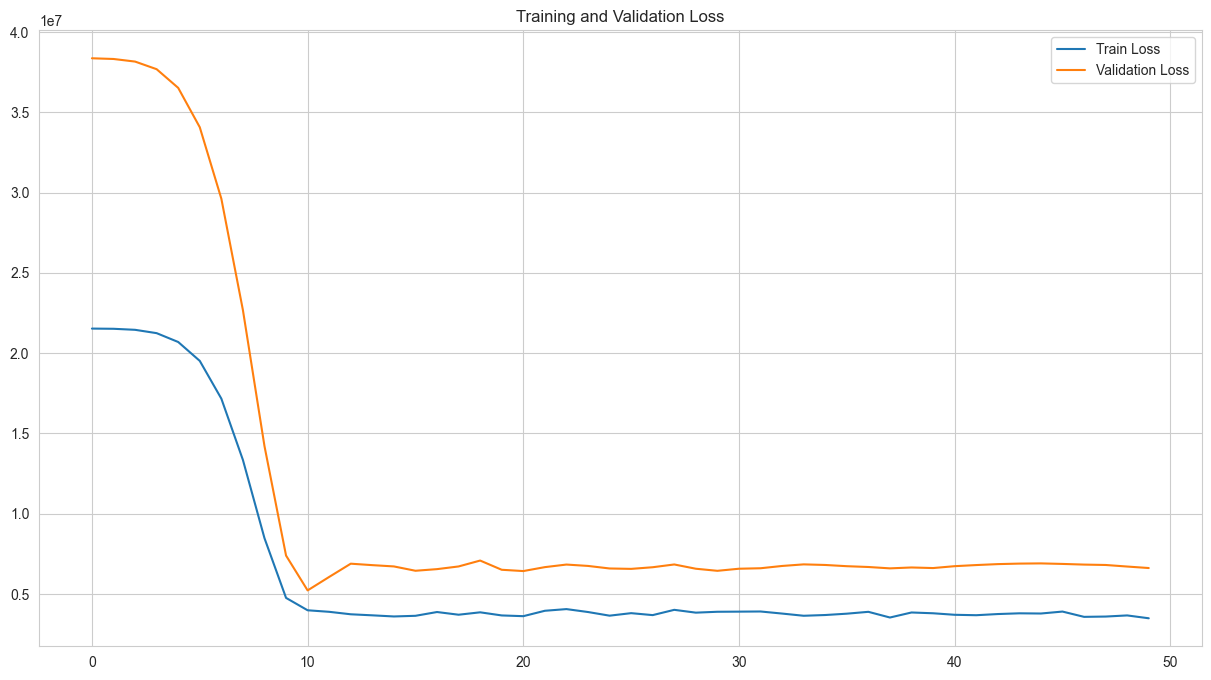

In [229]:
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

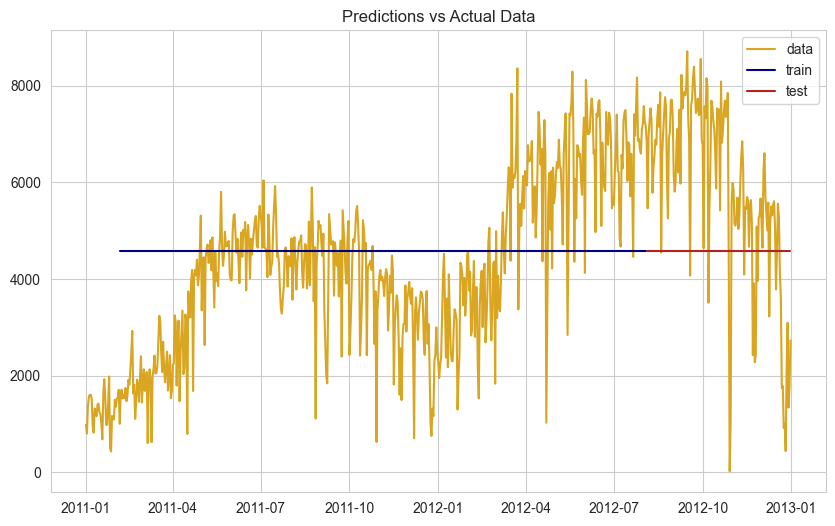

In [230]:
model.eval()
with torch.no_grad():
    train_preds = best_model(x_train_tensor).cpu().numpy()
    test_preds = best_model(x_test_tensor).cpu().numpy()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data["cnt"], c="goldenrod", label="data")
plt.plot(data.iloc[length : -len(y_test)].index, train_preds, c="navy", label="train")
plt.plot(data.iloc[-len(y_test) :].index, test_preds, c="firebrick", label="test")
plt.legend()
plt.title("Predictions vs Actual Data")
plt.show()

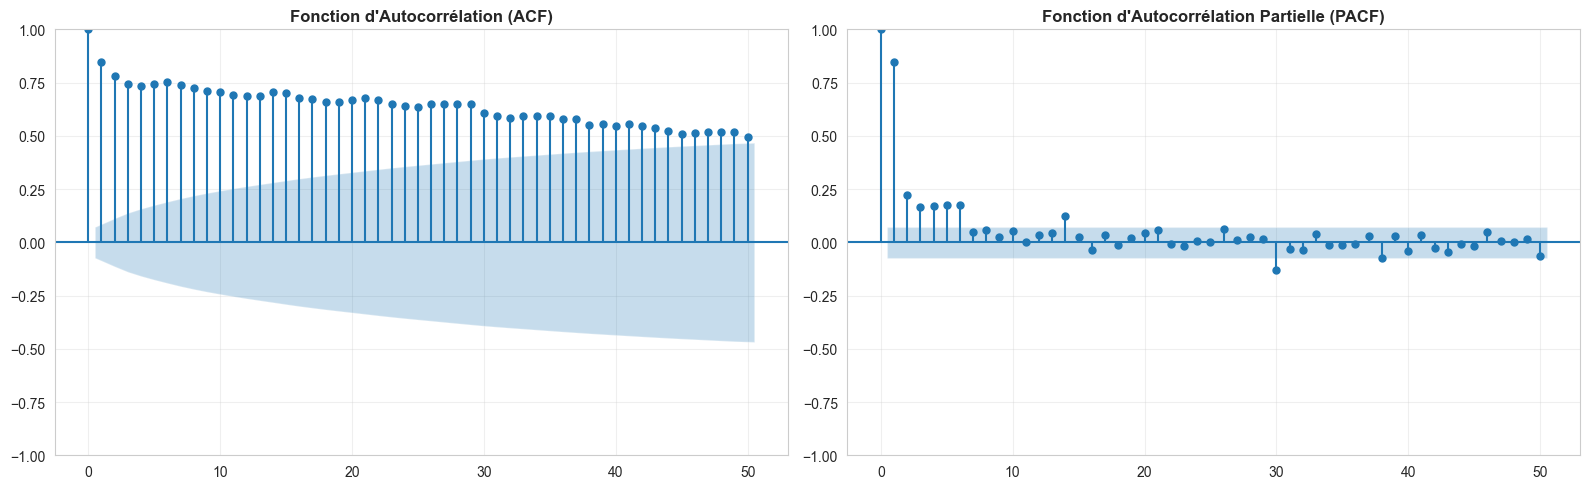

In [ ]:

# 4. ANALYSE DE L'AUTOCORRÉLATION
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

plot_acf(data['cnt'].dropna(), lags=50, ax=axes[0])
axes[0].set_title('Fonction d\'Autocorrélation (ACF)', 
                  fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

plot_pacf(data['cnt'].dropna(), lags=50, ax=axes[1])
axes[1].set_title('Fonction d\'Autocorrélation Partielle (PACF)', 
                  fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### **Analyse des fonctions d'autocorrélation**

#### **1. Observations**
- **Fonction d'autocorrélation (ACF)** :
  La décroissance exponentielle de l'ACF suggère la présence d'une **composante autorégressive (AR)** dans la série temporelle. Ce comportement est typique d'un processus où les valeurs passées influencent significativement les valeurs futures, avec un effet qui s'atténue progressivement.

- **Fonction d'autocorrélation partielle (PACF)** :
  La PACF devient nulle à partir du **lag 6**, avec des pics significatifs aux lags inférieurs. Cela indique que le processus peut être modélisé par un **modèle AR(6)**, où seuls les 6 lags précédents ont un impact direct sur la valeur actuelle.

#### **2. Interprétation et hypothèses**
- **Modèle ARMA(6,0)** :
  D'après l'analyse de la PACF, un modèle **AR(6)** semble approprié pour capturer la structure de dépendance linéaire de la série.

- **Saisonnalité** :
  - **Effet hebdomadaire** : L'influence du même jour de la semaine précédente suggère une **saisonnalité de lag 7**. Cela peut être capturé par une **différenciation saisonnière** d'ordre 1 avec un lag 7.
  - **Tendance annuelle** : Une saisonnalité annuelle est également suspectée, ce qui pourrait nécessiter une différenciation saisonnière supplémentaire avec un lag 365 (pour des données quotidiennes) ou 52 (pour des données hebdomadaires).

#### **3. Proposition de modélisation**
Pour intégrer ces observations, un modèle **SARIMA** (Seasonal ARIMA) est recommandé :
- **Composante non saisonnière** : AR(6), soit \( p = 6 \).
- **Composante saisonnière** :
  - Différenciation saisonnière d'ordre 1 avec un lag 7, soit \( (P, D, Q)_7 = (0, 1, 0)_7 \).
  - Si la saisonnalité annuelle est confirmée, une différenciation saisonnière supplémentaire avec un lag 365 peut être ajoutée, soit \( (P, D, Q)_{365} = (0, 1, 0)_{365} \).

**Formule finale** :

$SARIMA(6, 0, 0)(0, 1, 0)_7$ ou $SARIMA(6, 0, 0)(0, 1, 0)_7 \times (0, 1, 0)_{365}$


#### **4. Prochaines étapes**
- **Validation du modèle** : Vérifier les résidus pour s'assurer qu'ils sont non corrélés (test de Ljung-Box).
- **Sélection du modèle** : Utiliser des critères comme l'**AIC** ou le **BIC** pour comparer différentes configurations.
- **Prévisions** : Tester le modèle sur un jeu de données de validation pour évaluer sa performance prédictive.

---

MSE: 7312393.80
MAPE: 1.2028


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\NN\.venv\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


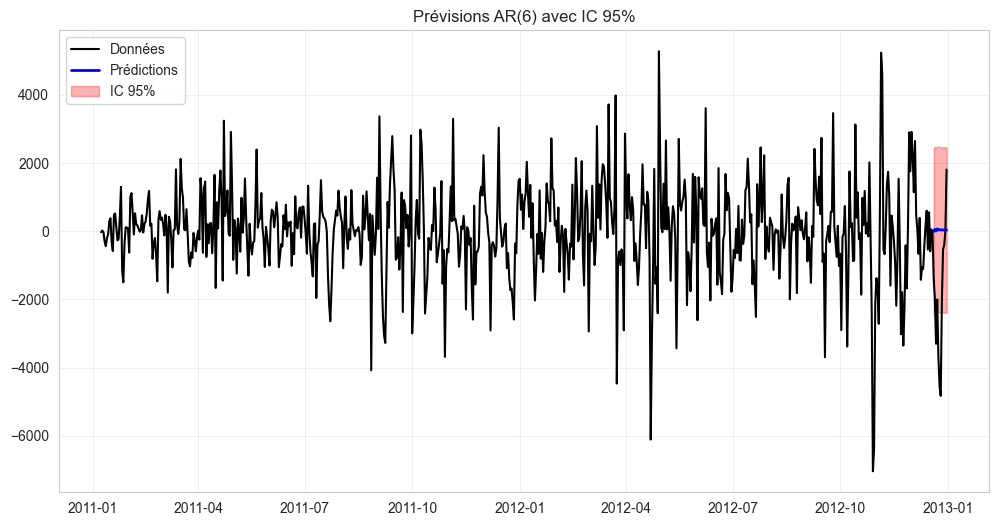

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from tqdm import tqdm

ts_data = data['cnt']
data_diff = ts_data.diff(7).dropna()

# Paramètres
refit = 1
train_window = 21
split_idx = int(len(data_diff) * 0.8)

# Liste pour stocker les prédictions
predictions_rolling = []
actuals = []

# Boucle de prédiction glissante
for i in tqdm(range(split_idx, len(data_diff))):
    # Réajuster le modèle tous les 'refit' pas ou au début
    if i % refit == 0 or i == split_idx:
        # Fenêtre d'entraînement glissante
        train_start = max(0, i - train_window)
        train_data = data_diff.iloc[train_start:i]
        
        # Ajuster le modèle AR(6)
        ar_model = AutoReg(train_data, lags=6)
        ar_fitted = ar_model.fit()
    
    # Prédiction pour le point suivant (1 step ahead)
    pred = ar_fitted.forecast(steps=1)
    predictions_rolling.append(pred[0])
    actuals.append(data_diff.iloc[i])

# Résidus
predictions_rolling = np.array(predictions_rolling)
actuals = np.array(actuals)
residuals = actuals - predictions_rolling

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0,0].plot(actuals, label='Valeurs Réelles', linewidth=1.5)
axes[0, 0].plot(predictions, label='Prédictions AR(6)', linewidth=1.5, linestyle='--')
axes[0, 0].set_title('Valeurs Réelles vs Prédictions AR(6)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(residuals, linewidth=1, color='red')
axes[0, 1].axhline(y=0, color='black', linestyle='--')
axes[0, 1].set_title('Résidus')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(residuals, bins=30, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Distribution des Résidus')

plot_acf(residuals, lags=40, ax=axes[1, 1])
axes[1, 1].set_title('ACF des Résidus')

plt.tight_layout()
plt.show()

In [153]:
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# le code au dessus ne fait pas de cross validation et ne prends en compte la saisonnalité de 12 mois !!!! il faut refaire les graphes 